# **Bank Account Fraud (NeurIPS 2022)**

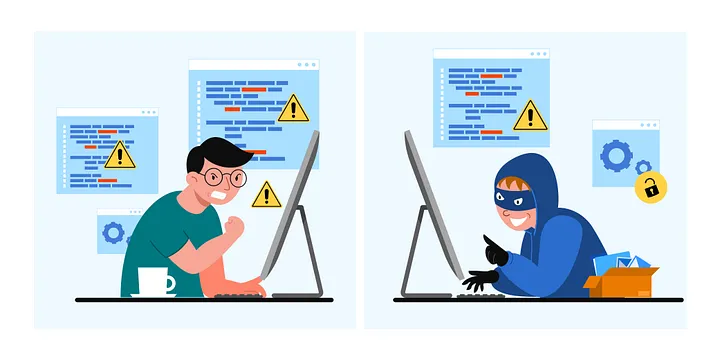

# **Data Describtion**
The Bank Account Fraud (BAF) suite of datasets has been published at NeurIPS 2022 and it comprises a total of 6 different synthetic bank account fraud tabular datasets. BAF is a realistic, complete, and robust test bed to evaluate novel and existing methods in ML and fair ML, and the first of its kind!

**This suite of datasets is:**

- Realistic, based on a present-day real-world dataset for fraud detection;
- Biased, each dataset has distinct controlled types of bias;
- Imbalanced, this setting presents a extremely low prevalence of positive class;
- Dynamic, with temporal data and observed distribution shifts;
- Privacy preserving, to protect the identity of potential applicants we have applied differential privacy - techniques (noise addition), feature encoding and trained a generative model (CTGAN).

**Each dataset is composed of:**

- 1 million instances;
- 30 realistic features used in the fraud detection use-case;
- A column of “month”, providing temporal information about the dataset;
- Protected attributes, (age group, employment status and % income).

Detailed information (datasheet) on the suite: https://github.com/feedzai/bank-account-fraud/blob/main/documents/datasheet.pdf

Check out the github repository for more resources and some example notebooks: https://github.com/feedzai/bank-account-fraud

Read the NeurIPS 2022 paper here: https://arxiv.org/abs/2211.13358

Learn more about Feedzai Research here: https://research.feedzai.com/

Please, use the following citation of BAF dataset suite

        @article{jesusTurningTablesBiased2022,
          title={Turning the {{Tables}}: {{Biased}}, {{Imbalanced}}, {{Dynamic Tabular Datasets}} for {{ML Evaluation}}},
          author={Jesus, S{\'e}rgio and Pombal, Jos{\'e} and Alves, Duarte and Cruz, Andr{\'e} and Saleiro, Pedro and Ribeiro, Rita P. and Gama, Jo{\~a}o and Bizarro, Pedro},
          journal={Advances in Neural Information Processing Systems},
          year={2022}
        }

# **Importing the libraries and the dataset**

In [1]:
!pip install missingno

In [2]:
!pip install imbalanced-learn

In [3]:
!pip install shap

In [37]:
#Import libraries
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import random
# Fill nulls    
from sklearn.impute import SimpleImputer

from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import learning_curve
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
import shap
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,classification_report,precision_recall_fscore_support,roc_auc_score, roc_curve


from sklearn.model_selection import train_test_split
import seaborn as sns

#Set Matplotlib options
%matplotlib inline
plt.style.use('ggplot')
sns.set_style("whitegrid")

#Increase max Pandas columns
pd.set_option('display.max_columns', 200)

#Define color palette
my_palette = sns.color_palette("Paired", 2)

# ignore FutureWarning
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)



In [5]:
'''# Install kaggle API
! pip install -q kaggle'''

'# Install kaggle API\n! pip install -q kaggle'

**upload kaggle API key to colab notebook**

In [6]:
'''# Make directory named kaggle and copy kaggle.json file there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/'''

'# Make directory named kaggle and copy kaggle.json file there\n! mkdir ~/.kaggle\n! cp kaggle.json ~/.kaggle/'

In [7]:
'''# disable API key
! chmod 600 /root/.kaggle/kaggle.json'''

'# disable API key\n! chmod 600 /root/.kaggle/kaggle.json'

In [8]:
'''# import the dataset
! kaggle datasets download -d mlg-ulb/creditcardfraud'''

'# import the dataset\n! kaggle datasets download -d mlg-ulb/creditcardfraud'

In [9]:
'''# unzipping the dataset
! unzip -q /content/creditcardfraud.zip'''

'# unzipping the dataset\n! unzip -q /content/creditcardfraud.zip'

# **Data Exploration**

In [7]:
df = pd.read_csv('Fraud Detection/neurips-2022/Base.csv')

In [11]:
df.head().T

0            1            2   
fraud_bool                                   1            1            1  \
income                                     0.9          0.9          0.9   
name_email_similarity                 0.166828     0.296286     0.044985   
prev_address_months_count                   -1           -1           -1   
current_address_months_count                88          144          132   
customer_age                                50           50           40   
days_since_request                    0.020925     0.005418     3.108549   
intended_balcon_amount               -1.331345    -0.816224    -0.755728   
payment_type                                AA           AB           AC   
zip_count_4w                               769          366          870   
velocity_6h                       10650.765523   534.047319  4048.534263   
velocity_24h                        3134.31963  2670.918292  2893.621498   
velocity_4w                         3863.64774  3124.298166  3159.590679   
bank_branch_count_8w                         1          718            1   
date_of_birth_distinct_emails_4w             6            3           14   
employment_status                           CA           CA           CB   
credit_risk_score                          185          259          177   
email_is_free                                0            1            1   
housing_status                              BA           BA           BA   
phone_home_valid                             1            0            0   
phone_mobile_valid                           0            0            1   
bank_months_count                           24           15           -1   
has_other_cards                              0            0            0   
proposed_credit_limit                    500.0       1500.0        200.0   
foreign_request                              0            0            0   
source                                INTERNET     INTERNET     INTERNET   
session_length_in_minutes             3.888115    31.798819     4.728705   
device_os                              windows      windows        other   
keep_alive_session                           0            0            0   
device_distinct_emails_8w                    1            1            1   
device_fraud_count                           0            0            0   
month                                        7            7            7   

                                            3            4  
fraud_bool                                  1            1  
income                                    0.9          0.9  
name_email_similarity                0.159511     0.596414  
prev_address_months_count                  -1           -1  
current_address_months_count               22          218  
customer_age                               50           50  
days_since_request                   0.019079     0.004441  
intended_balcon_amount              -1.205124    -0.773276  
payment_type                               AB           AB  
zip_count_4w                              810          890  
velocity_6h                       3457.064063  5020.341679  
velocity_24h                      4054.908412  2728.237159  
velocity_4w                       3022.261812  3087.670952  
bank_branch_count_8w                     1921         1990  
date_of_birth_distinct_emails_4w            6            2  
employment_status                          CA           CA  
credit_risk_score                         110          295  
email_is_free                               1            1  
housing_status                             BA           BA  
phone_home_valid                            0            1  
phone_mobile_valid                          1            0  
bank_months_count                          31           31  
has_other_cards                             1            0  
proposed_credit_limit                   200.0       1500.0  
foreign_req

In [12]:
df.shape

(1000000, 32)

In [13]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [15]:
# statistical summary
df.describe().T

count         mean          std   
fraud_bool                        1000000.0     0.011029     0.104438  \
income                            1000000.0     0.562696     0.290343   
name_email_similarity             1000000.0     0.493694     0.289125   
prev_address_months_count         1000000.0    16.718568    44.046230   
current_address_months_count      1000000.0    86.587867    88.406599   
customer_age                      1000000.0    33.689080    12.025799   
days_since_request                1000000.0     1.025705     5.381835   
intended_balcon_amount            1000000.0     8.661499    20.236155   
zip_count_4w                      1000000.0  1572.692049  1005.374565   
velocity_6h                       1000000.0  5665.296605  3009.380665   
velocity_24h                      1000000.0  4769.781965  1479.212612   
velocity_4w                       1000000.0  4856.324016   919.843934   
bank_branch_count_8w              1000000.0   184.361849   459.625329   
date_of_birth_distinct_emails_4w  1000000.0     9.503544     5.033792   
credit_risk_score                 1000000.0   130.989595    69.681812   
email_is_free                     1000000.0     0.529886     0.499106   
phone_home_valid                  1000000.0     0.417077     0.493076   
phone_mobile_valid                1000000.0     0.889676     0.313293   
bank_months_count                 1000000.0    10.839303    12.116875   
has_other_cards                   1000000.0     0.222988     0.416251   
proposed_credit_limit             1000000.0   515.851010   487.559902   
foreign_request                   1000000.0     0.025242     0.156859   
session_length_in_minutes         1000000.0     7.544940     8.033106   
keep_alive_session                1000000.0     0.576947     0.494044   
device_distinct_emails_8w         1000000.0     1.018312     0.180761   
device_fraud_count                1000000.0     0.000000     0.000000   
month                             1000000.0     3.288674     2.209994   

                                           min          25%          50%   
fraud_bool                        0.000000e+00     0.000000     0.000000  \
income                            1.000000e-01     0.300000     0.600000   
name_email_similarity             1.434550e-06     0.225216     0.492153   
prev_address_months_count        -1.000000e+00    -1.000000    -1.000000   
current_address_months_count     -1.000000e+00    19.000000    52.000000   
customer_age                      1.000000e+01    20.000000    30.000000   
days_since_request                4.036860e-09     0.007193     0.015176   
intended_balcon_amount           -1.553055e+01    -1.181488    -0.830507   
zip_count_4w                      1.000000e+00   894.000000  1263.000000   
velocity_6h                      -1.706031e+02  3436.365848  5319.769349   
velocity_24h                      1.300307e+03  3593.179135  4749.921161   
velocity_4w                       2.825748e+03  4268.368423  4913.436941   
bank_branch_count_8w              0.000000e+00     1.000000     9.000000   
date_of_birth_distinct_emails_4w  0.000000e+00     6.000000     9.000000   
credit_risk_score                -1.700000e+02    83.000000   122.000000   
email_is_free                     0.000000e+00     0.000000     1.000000   
phone_home_valid                  0.000000e+00     0.000000     0.000000   
phone_mobile_valid                0.000000e+00     1.000000     1.000000   
bank_months_count                -1.000000e+00    -1.000000     5.000000   
has_other_cards                   0.000000e+00     0.000000     0.000000   
proposed_credit_limit             1.900000e+02   200.000000   200.000000   
foreign_request                   0.000000e+00     0.000000     0.000000   
session_length_in_minutes        -1.000000e+00     3.103053     5.114321   
keep_alive_session                0.000000e+00     0.000000     1.000000   
device_distinct_emails_8w        -1.000000e+00     1.000000     1.000000   
device_fraud_coun

In [16]:
df.describe(include=["object", "bool"]).T

count unique       top    freq
payment_type       1000000      5        AB  370554
employment_status  1000000      7        CA  730252
housing_status     1000000      7        BC  372143
source             1000000      2  INTERNET  992952
device_os          1000000      5     other  342728

**We can notice that the feature distributions and whether they are skewed or have high kurtosis:**

- fraud_bool: Highly skewed towards 0 with skewness of 5.76, indicating very few fraudulent transactions
- income: Slightly right skewed with skewness of 0.46, so majority of customers have lower to mid range incomes
- name_email_similarity: Approximately symmetric with skewness of 0.07
- prev_address_months_count: Highly right skewed with skewness of 3.13, indicating most customers have been at their previous address for just a few months
- current_address_months_count: Right skewed with skewness of 1.84
- customer_age: Approximately symmetric with skewness of -0.22
- days_since_request: Highly right skewed with skewness of 6.55, indicating few requests are several weeks old
- intended_balcon_amount: Highly right skewed with skewness of 3.18, majority of requests are for modest amounts
- zip_count_4w: Right skewed with skewness of 1.41

Other features also show signs of skewness and some have high kurtosis indicating more outlier values, most features have skewed distributions rather than normal or symmetric ones.

In [17]:
df.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

## **Dealing with missing values**

In the datasheet we have 
- prev_address_months_count - Number of months at applicant's previous address, ranging from -1 to 380 (-1 is missing data)
- bank_months_count - Age of applicant's previous bank account in months, ranging from -1 to 32 (-1 is missing)
- device_distinct_emails (numeric): Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [−1, 2] emails (-1 is a missing value).

- session_length_in_minutes (numeric): Length of user session in banking website in minutes. Ranges between [−1, 107] minutes (-1 is a missing value).
- current_address_months_count (numeric): Months in currently registered address of the applicant. Ranges between [−1, 429] months (-1 is a missing value).

- Intended_balcon_amount (numeric): Initial transferred amount for application. Ranges between [−16, 114] (negatives are missing values).

In [6]:
numerical_features = []

for col in df.columns:
    if df[col].dtypes =='float64' or df[col].dtypes =='int64':
        numerical_features.append(col)

numerical_features

['fraud_bool',
 'income',
 'name_email_similarity',
 'prev_address_months_count',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'intended_balcon_amount',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'email_is_free',
 'phone_home_valid',
 'phone_mobile_valid',
 'bank_months_count',
 'has_other_cards',
 'proposed_credit_limit',
 'foreign_request',
 'session_length_in_minutes',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'device_fraud_count',
 'month']

### **Function for Replace Negatives values**

In [8]:
def replace_negatives(df):
        
    # Replace -1 with NaN for specific columns      
    cols = ['prev_address_months_count',
                'current_address_months_count',
                  'bank_months_count',
                    'session_length_in_minutes',
                      'device_distinct_emails_8w']  

    for col in cols:      
        df[col] = df[col].replace(-1, np.nan)

    # Replace all negative values in specific column            
    df['intended_balcon_amount'] = df['intended_balcon_amount'].replace(
        [x for x in df['intended_balcon_amount'] if x < 0], np.nan)
        
replace_negatives(df)

**Missing Values of Features by Fraud Status**

In [ ]:
# Initialize an empty DataFrame to hold the percentage of missing values for each feature
missing_vals = pd.DataFrame()

# List of features to check for missing values
missing_features = ['prev_address_months_count',
'current_address_months_count',
'bank_months_count',
'session_length_in_minutes',
'device_distinct_emails_8w']

# calculate the percentage of missing values, and add to the missing_vals DataFrame
for feature in missing_features:
    missing_vals_col = df.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()/len(x) * 100, 2))
    missing_vals[feature] = missing_vals_col

print(missing_vals)

In [22]:
# Reshape the missing_vals DataFrame from wide to long format
missing_vals = pd.DataFrame(missing_vals.T.stack())

# Reset the index and rename the columns
missing_vals.reset_index(inplace=True)
missing_vals.rename(columns={'level_0': 'feature', 0: 'missing_vals'}, inplace=True)

print(missing_vals)

                        feature  fraud_bool  missing_vals
0     prev_address_months_count           0         71.06
1     prev_address_months_count           1         91.89
2  current_address_months_count           0          0.43
3  current_address_months_count           1          0.13
4             bank_months_count           0         25.23
5             bank_months_count           1         37.54
6     session_length_in_minutes           0          0.20
7     session_length_in_minutes           1          0.16
8     device_distinct_emails_8w           0          0.04
9     device_distinct_emails_8w           1          0.04


<Figure size 800x600 with 0 Axes>

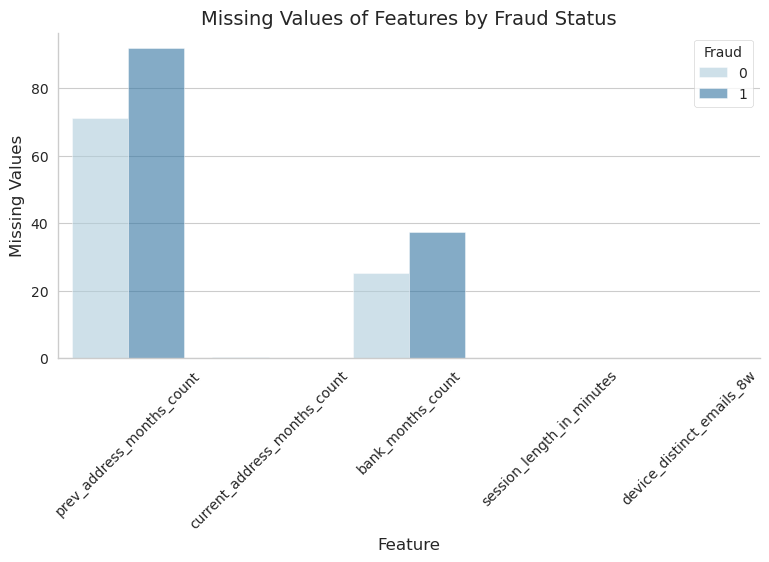

In [23]:
# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.catplot(data=missing_vals, kind="bar", x="feature", y="missing_vals", hue="fraud_bool", palette=my_palette, alpha=.6, height=4, aspect=2, legend=False)

# Customize labels and legend
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Missing Values", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Missing Values of Features by Fraud Status", fontsize=14)
plt.legend(title="Fraud", fontsize=10)

# Display plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


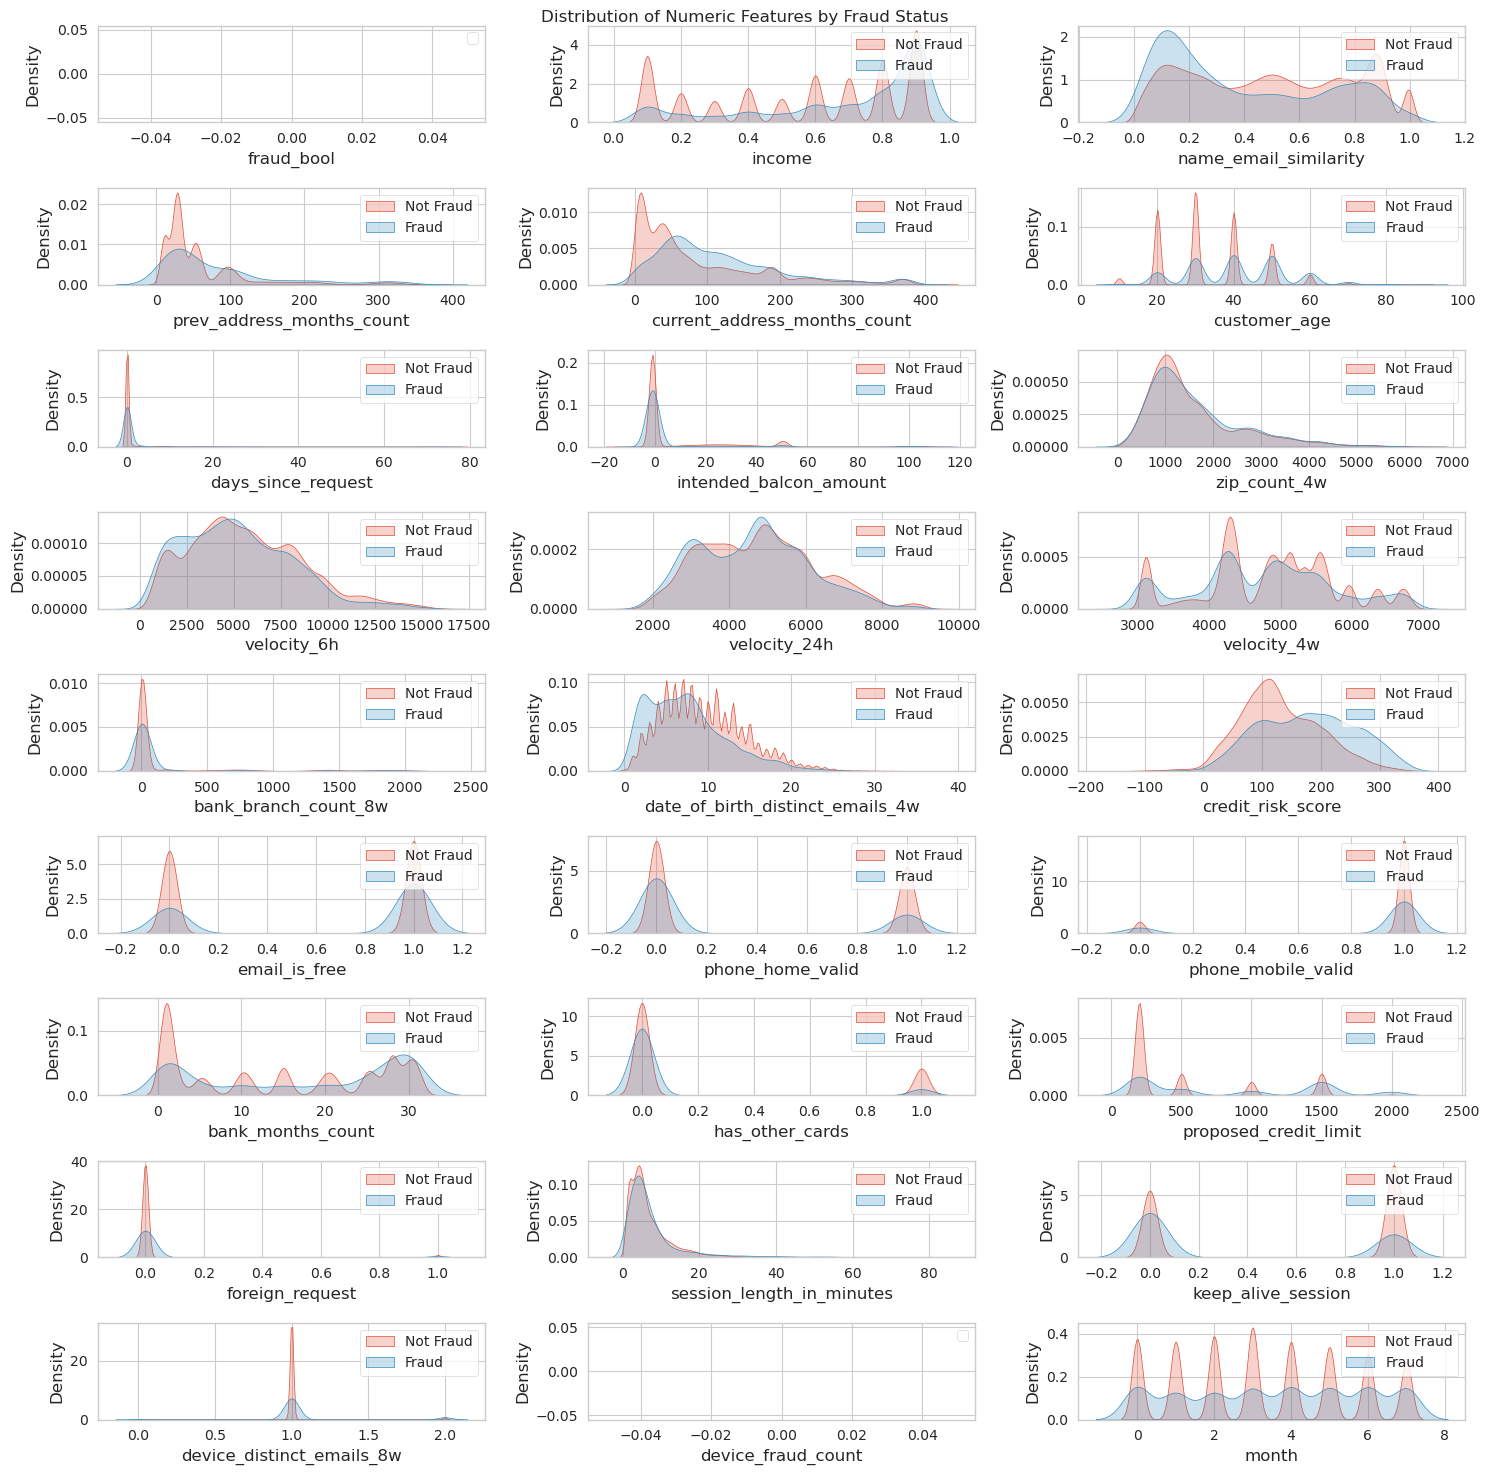

In [24]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numerical_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=df[df['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud',warn_singular=False)
    sns.kdeplot(data=df[df['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud',warn_singular=False)
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

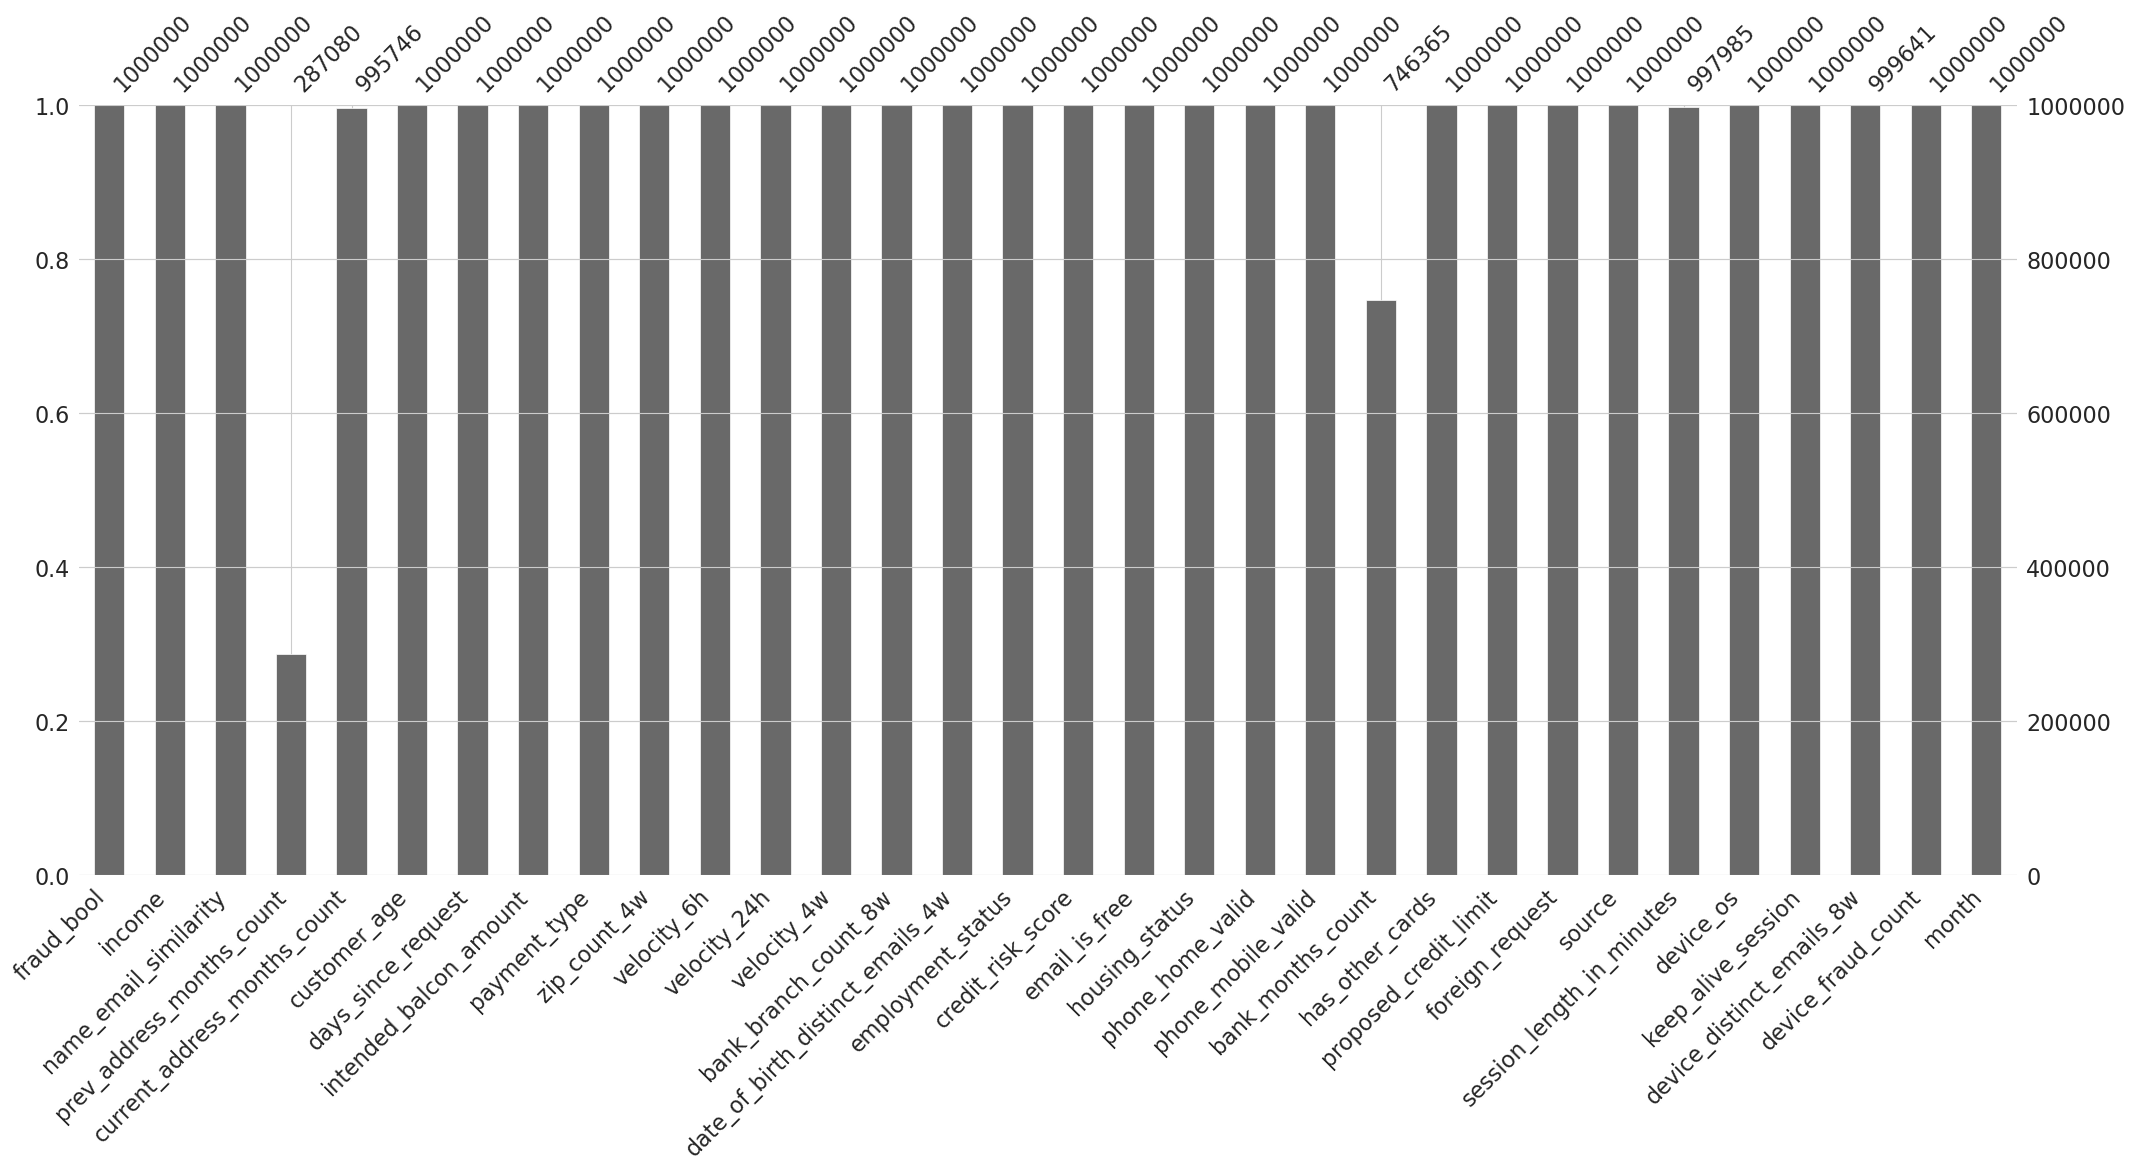

In [25]:
# Bar plot of missing data percentage by column
msno.bar(df)
plt.show()

In [26]:
df.isnull().values.any()

True

In [27]:
df.isnull().values.sum()

973183

### **Function for Impute Missing values**

In [9]:
def impute_missing(df):
        
        # Get all columns with missing values
        cols_missing = df.columns[df.isna().any()]

        for col in cols_missing:
            # Impute median for all columns with missing
            df[col].fillna(df[col].median(), inplace=True)
            
impute_missing(df)

In [ ]:
df.isnull().values.sum()

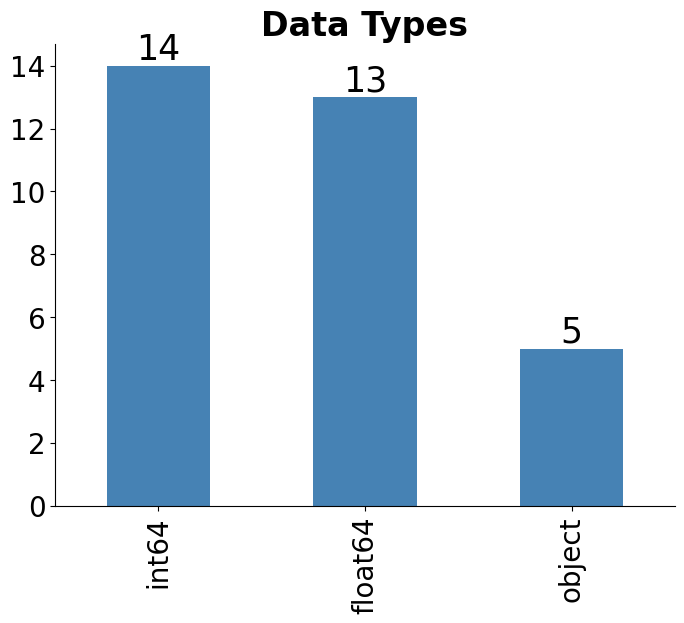

In [30]:
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("default")
plt.figure(figsize = (8,6))
ax = df.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20,color='SteelBlue')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 0.2, height, ha = 'center', size = 25, color='black')
ax.set_title('Data Types', ha = 'center', weight='bold', fontsize=24)
sns.despine()
plt.show()

In [31]:
len(df.select_dtypes(include='object').columns)

5

In [32]:
df.select_dtypes(include='object').columns

Index(['payment_type', 'employment_status', 'housing_status', 'source',
       'device_os'],
      dtype='object')

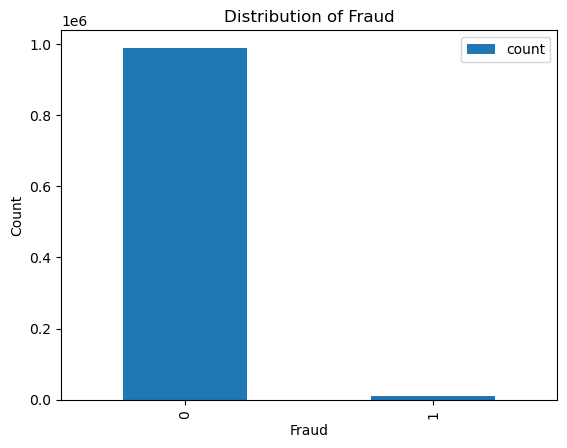

In [33]:
# Count the number of True and False values
fraud_bool_counts = df['fraud_bool'].value_counts()

# Plot a bar chart
fraud_bool_counts.plot.bar()

# Add a title
plt.title('Distribution of Fraud')

# Add x and y labels
plt.xlabel('Fraud')
plt.ylabel('Count')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [34]:
print(f"Fraud cases: {fraud_bool_counts[1]}")
print(f"Non-fraud cases: {fraud_bool_counts[0]}")

Fraud cases: 11029
Non-fraud cases: 988971


In [11]:
num_df=df[numerical_features]

In [12]:
df_dumm = pd.get_dummies(df,drop_first=True) # one hot encoding

In [37]:
df_dumm.shape

(1000000, 53)

## **Correlation matrix and heatmap**

In [38]:
dataset_2 = df_dumm.drop(columns='fraud_bool')

<Axes: title={'center': 'Correlated with Class'}>

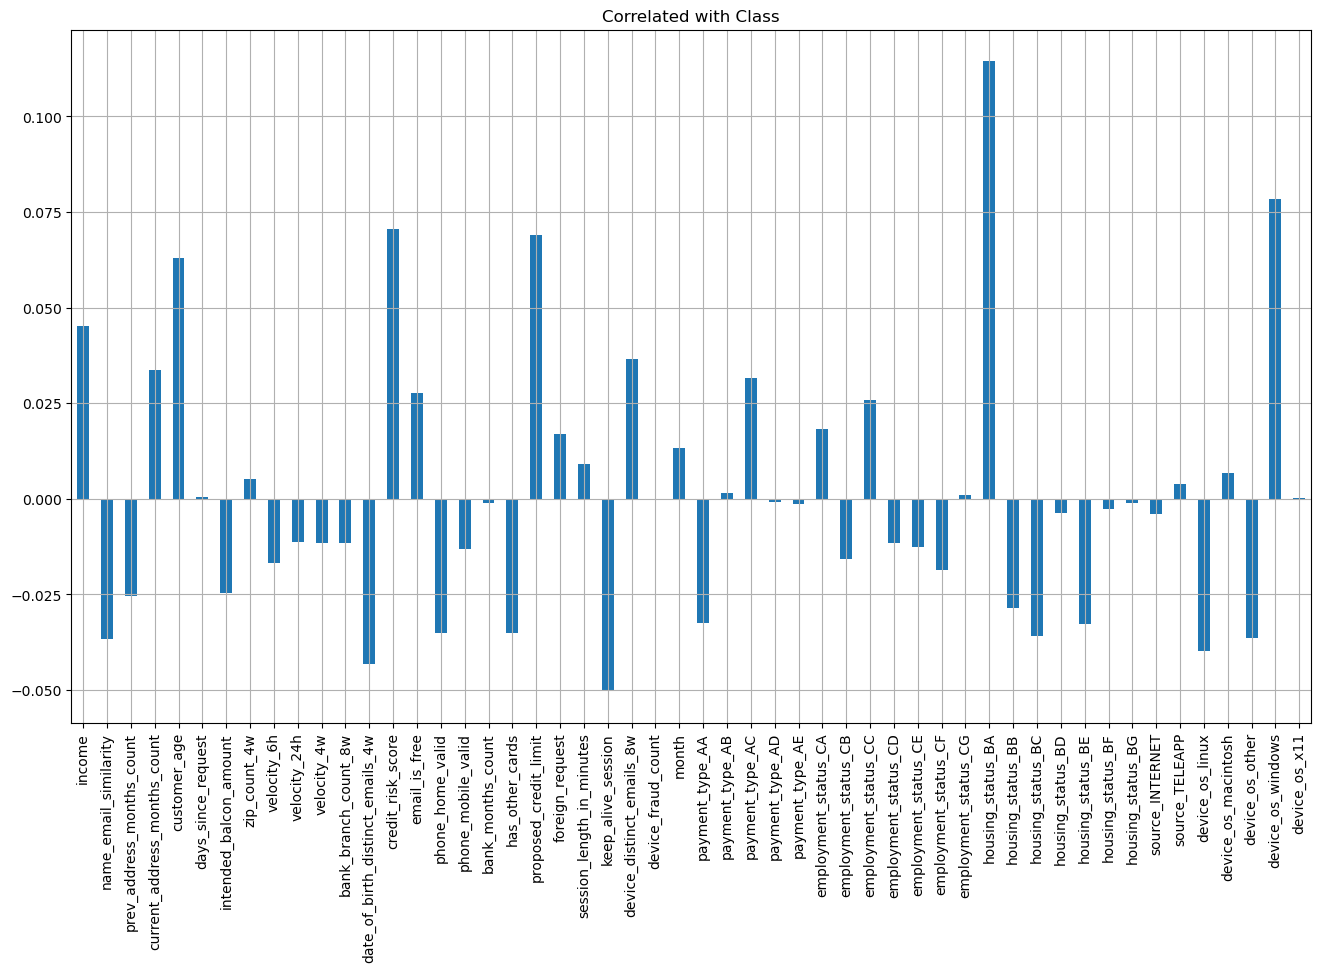

In [39]:
corr = dataset_2.corrwith(df_dumm['fraud_bool'])
dataset_2.corrwith(df_dumm['fraud_bool']).plot.bar(
    figsize=(16, 9),
    title='Correlated with Class',
    grid=True
)

In [40]:
# Get top 20 most correlated features
top_features = corr.nlargest(20).index
top_features

Index(['housing_status_BA', 'device_os_windows', 'credit_risk_score',
       'proposed_credit_limit', 'customer_age', 'income',
       'device_distinct_emails_8w', 'current_address_months_count',
       'payment_type_AC', 'email_is_free', 'employment_status_CC',
       'employment_status_CA', 'foreign_request', 'month',
       'session_length_in_minutes', 'device_os_macintosh', 'zip_count_4w',
       'source_TELEAPP', 'payment_type_AB', 'employment_status_CG'],
      dtype='object')

In [41]:
corr=num_df.corr()

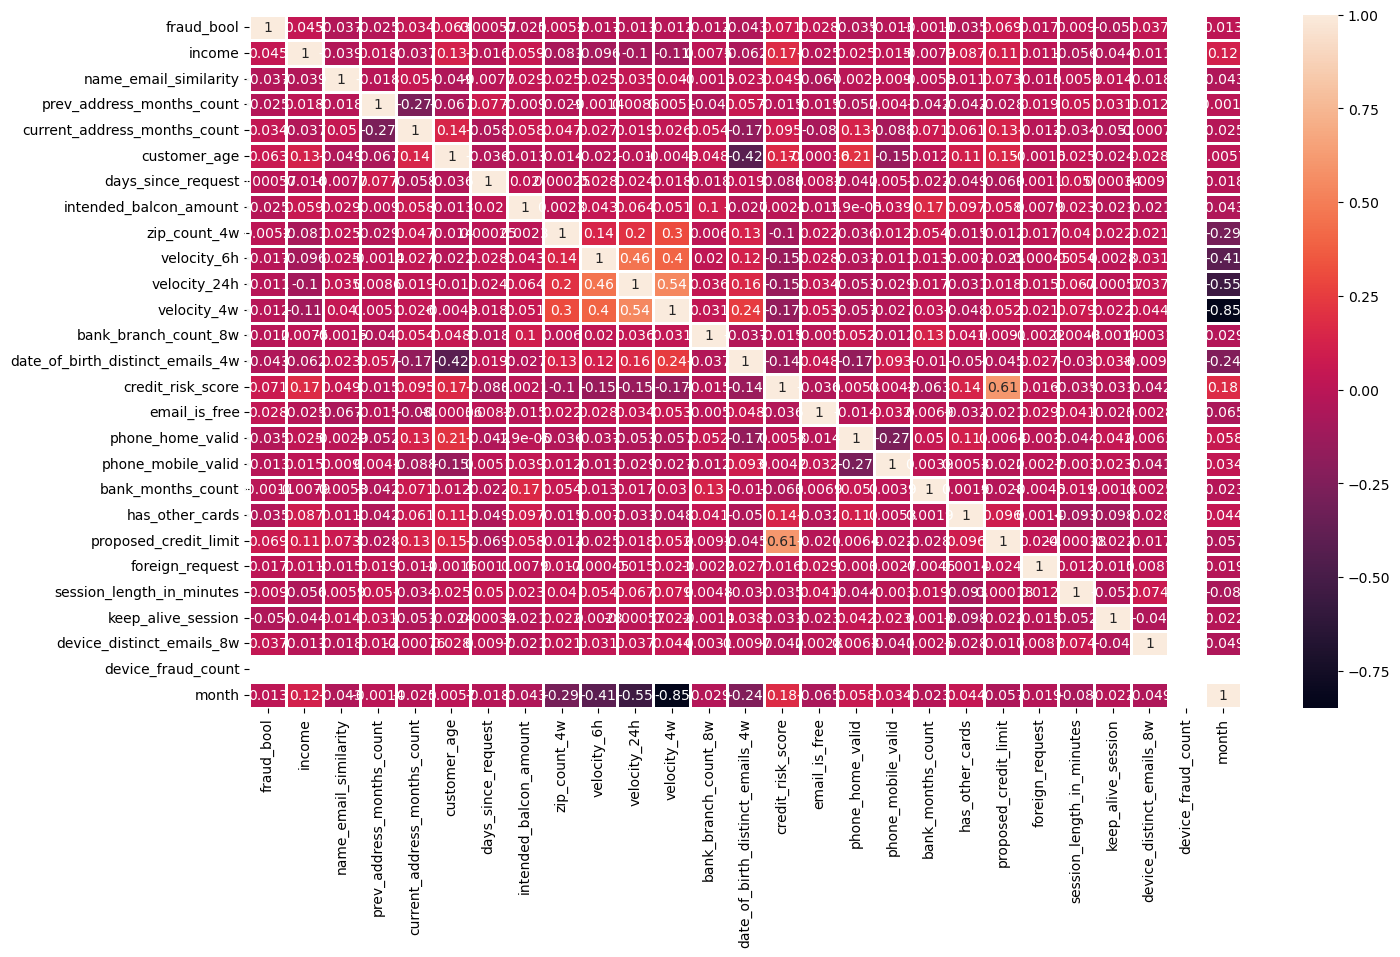

In [42]:
#correlation of numerical features
plt.figure(figsize=(16, 9))
ax = sns.heatmap(corr, annot=True, linewidths=2)

In [43]:
corr = df_dumm.corr()

In [44]:
plt.figure(figsize=(16, 9))
ax = sns.heatmap(corr, annot=True, linewidths=2)

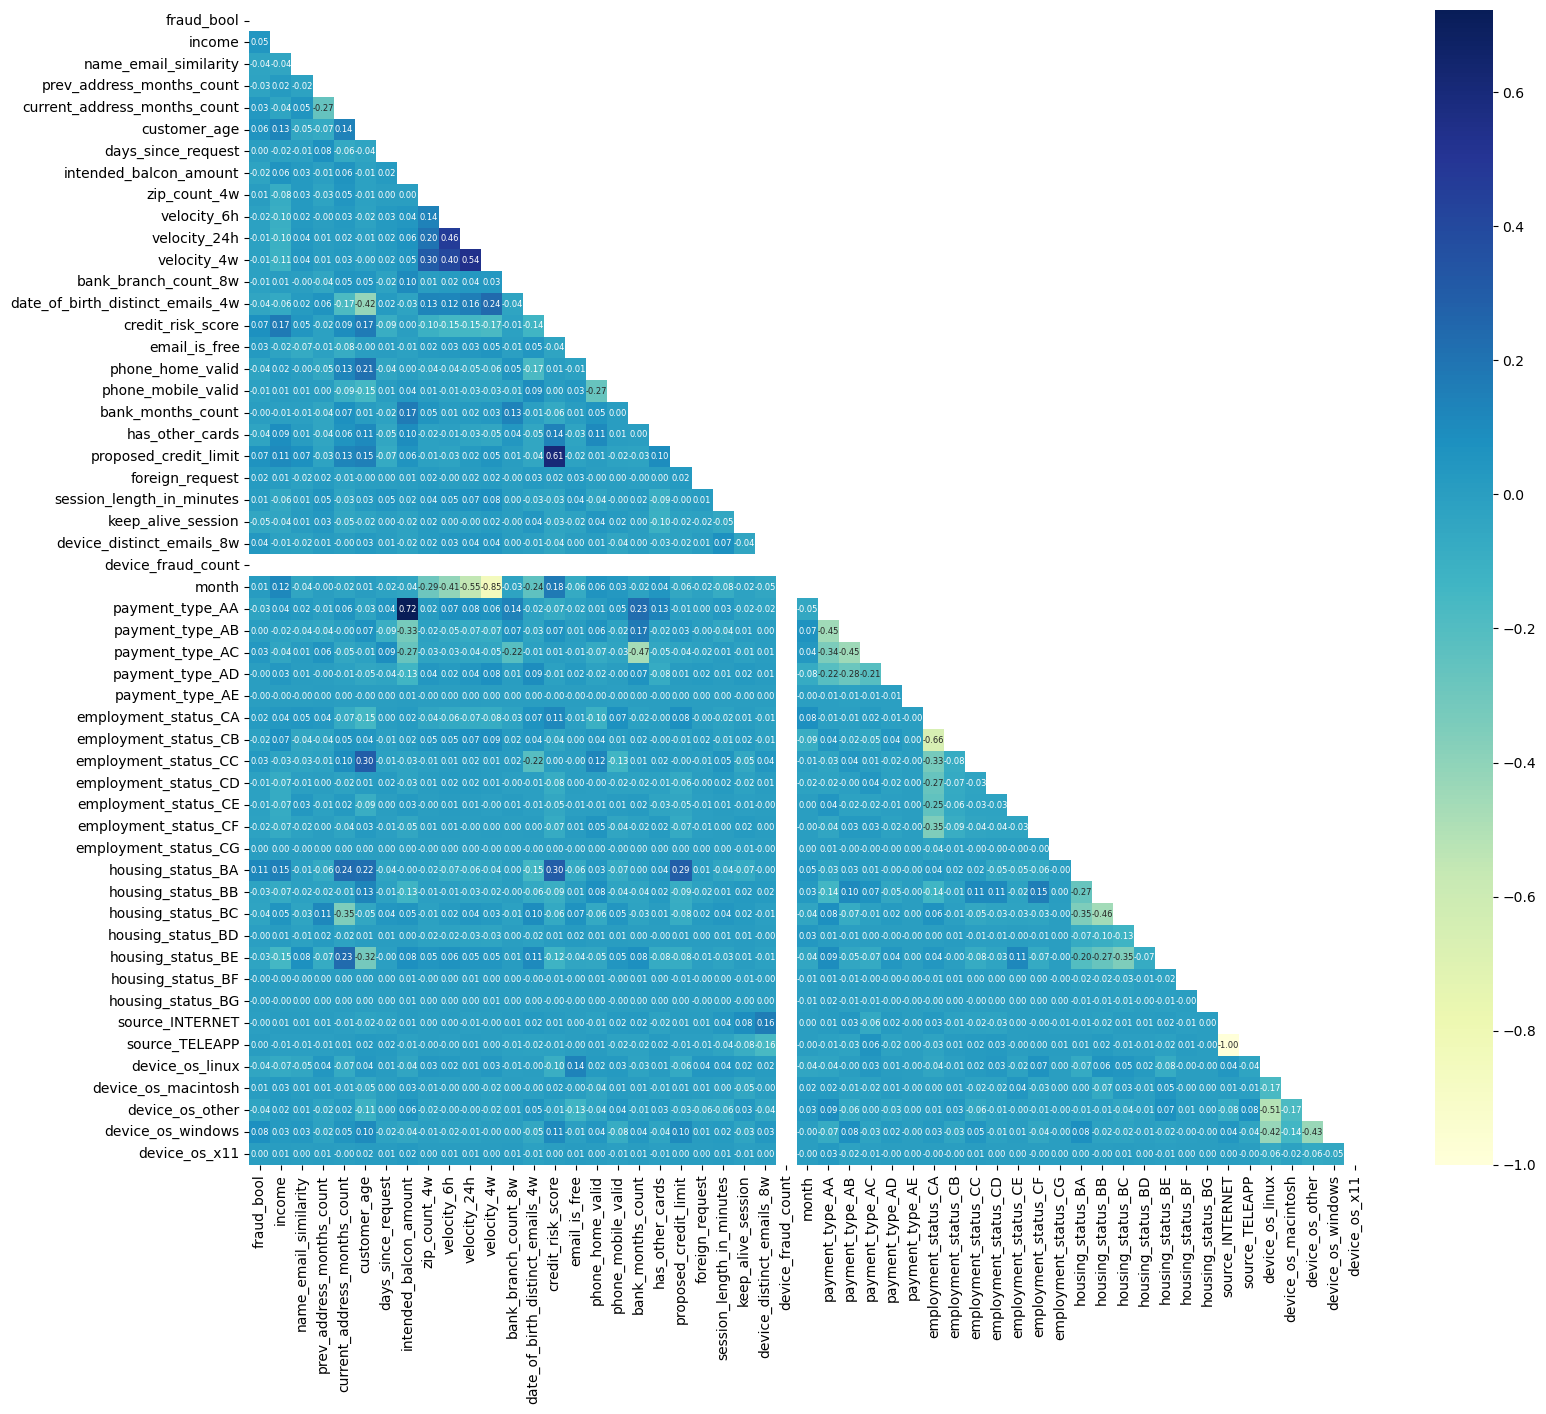

In [45]:
plt.figure(figsize=(18, 15))
mask = np.triu(np.ones_like(corr))
heatmap = sns.heatmap(corr, mask=mask, annot=True, cmap=plt.cm.YlGnBu, annot_kws={"fontsize": 6}, fmt=".2f")  # Set fmt to ".2f" to display 2 decimals
plt.show()

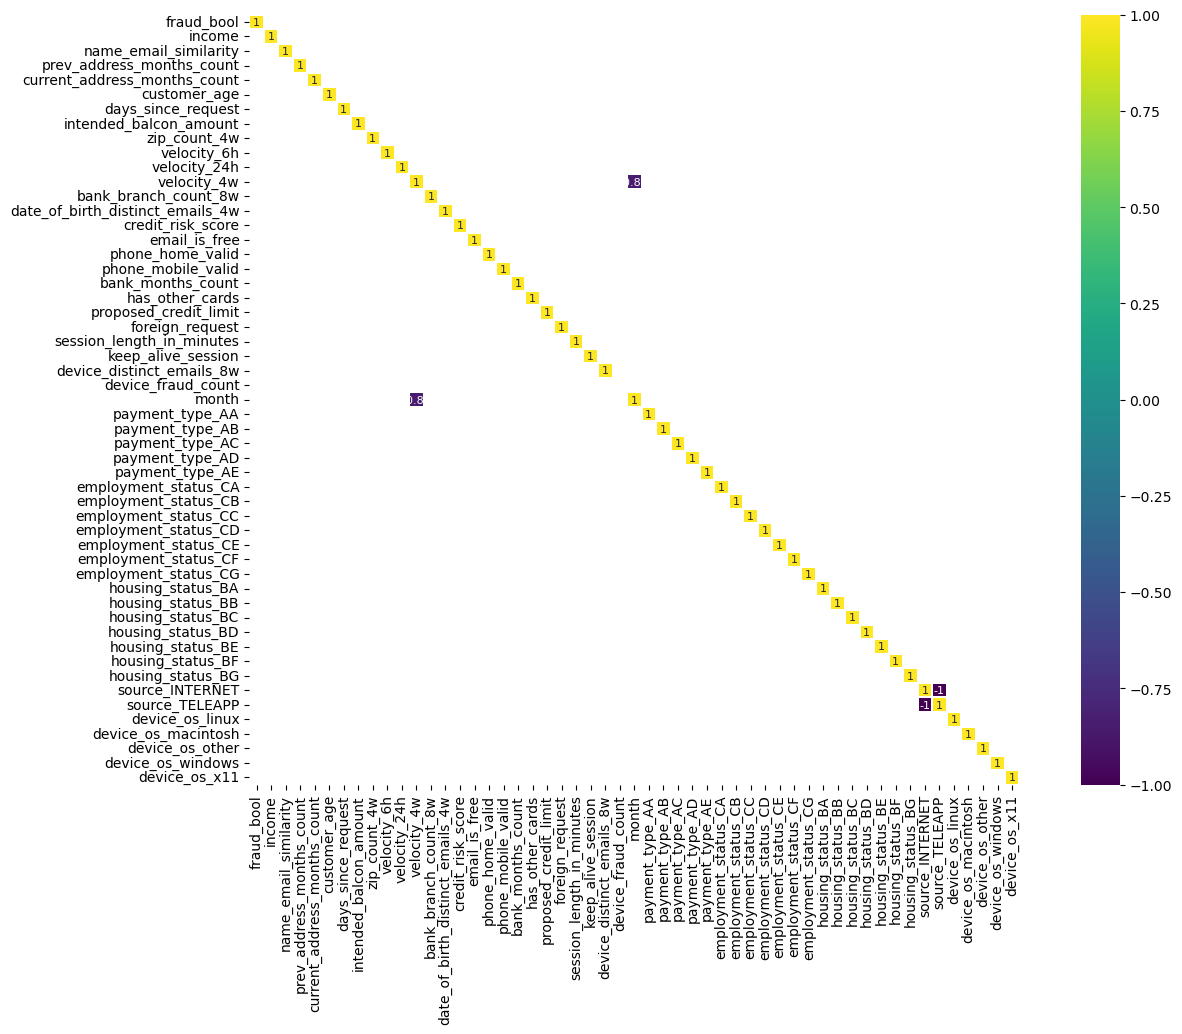

In [46]:
#check multicollinearity
plt.figure(figsize=(16, 10))

sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.8)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## **Numerical data distribution and Outliers**

For this part lets look at the distribution of all of the features by ploting them

To do so lets first list all the types of our data from our dataset and take only the numerical ones:

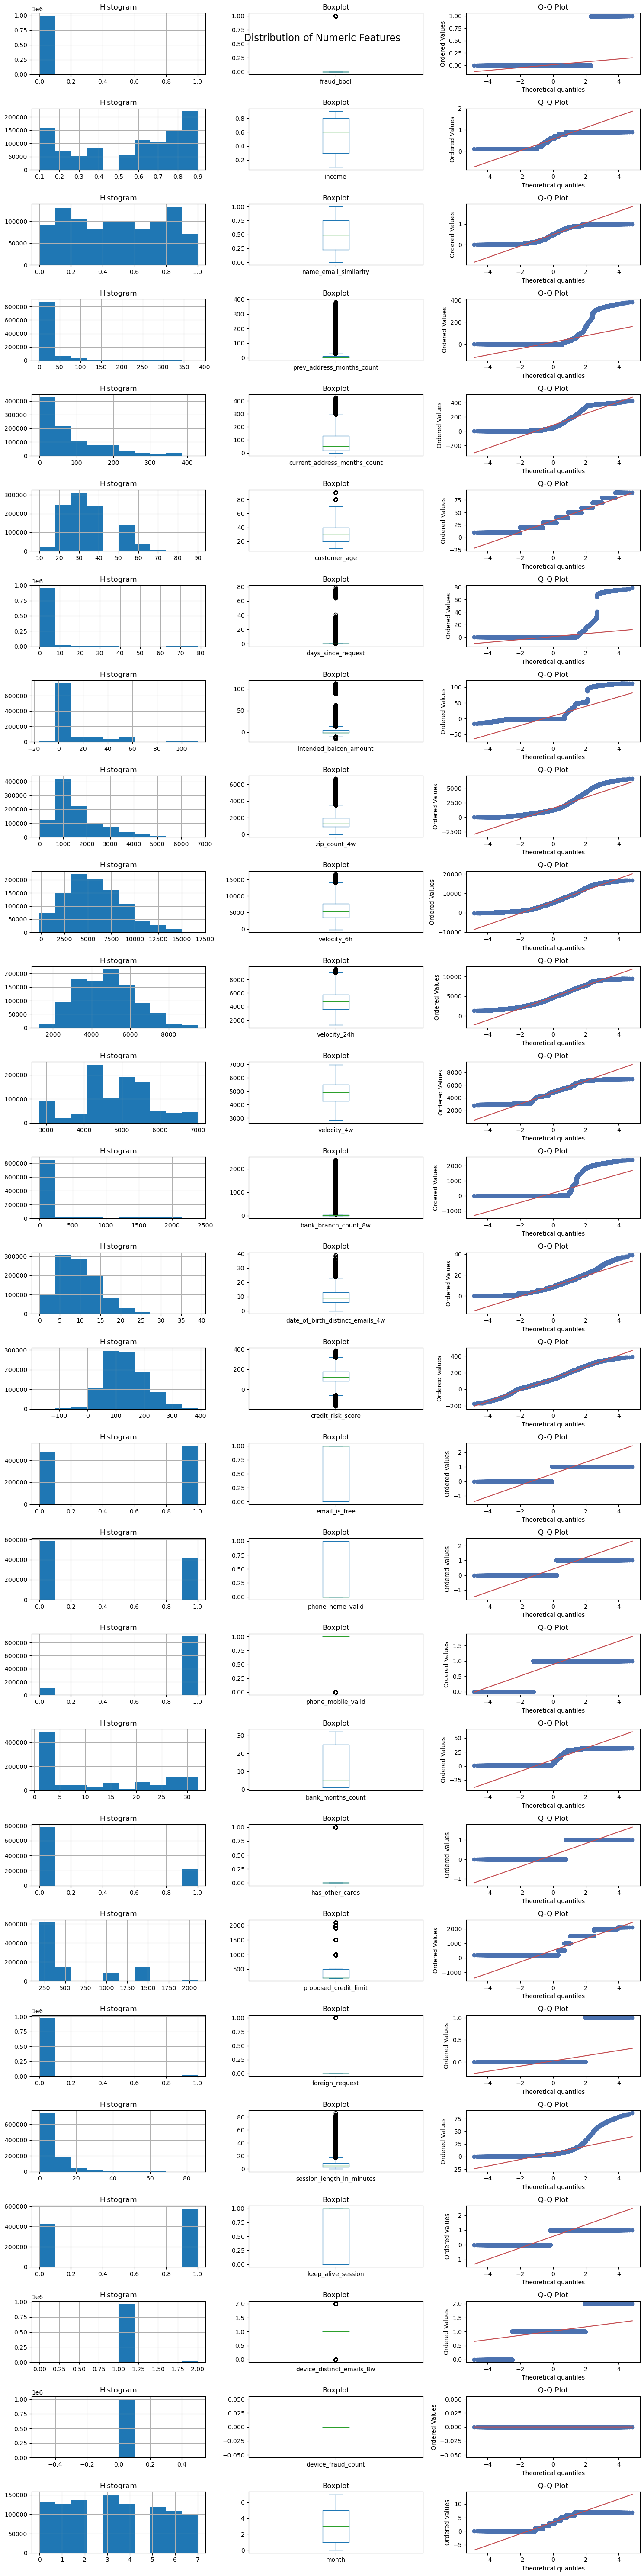

In [47]:
# Create figure and grid
fig, axes = plt.subplots(27, 3, figsize=(15,60))
fig.suptitle('Distribution of Numeric Features', fontsize=16)

# Loop through features
for i, col in enumerate(num_df.columns):

    # Histogram
    ax1 = axes[i, 0]
    num_df[col].hist(ax=ax1)
    ax1.set_title('Histogram')

    # Boxplot
    ax2 = axes[i, 1]
    num_df[col].plot(kind='box', ax=ax2)
    ax2.set_title('Boxplot')

    # Q-Q Plot
    ax3 = axes[i, 2]
    stats.probplot(num_df[col],
                  dist="norm",
                  plot=ax3)
    ax3.set_title('Q-Q Plot')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

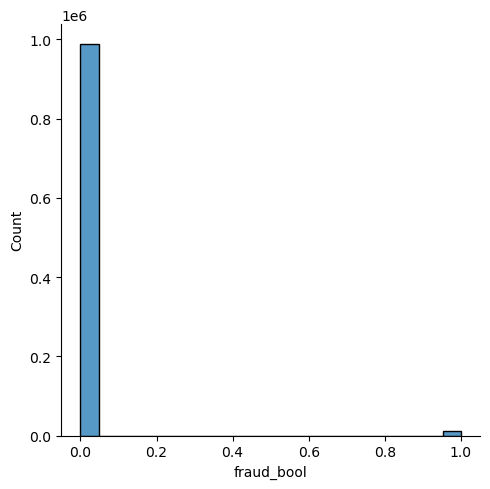

Column: fraud_bool
Skewness: 9.36383824730001
Kurtosis: 85.68163808487074


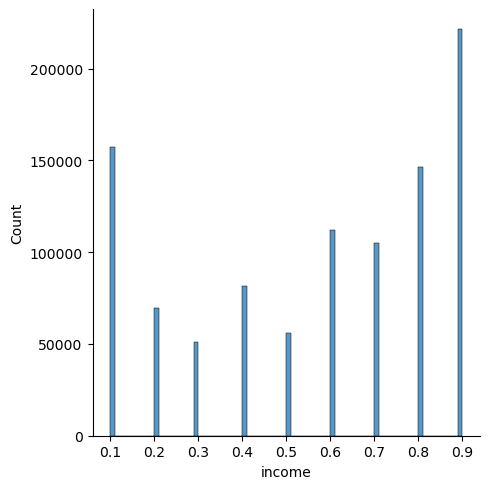

Column: income
Skewness: -0.3863374117420346
Kurtosis: -1.2993664445074034


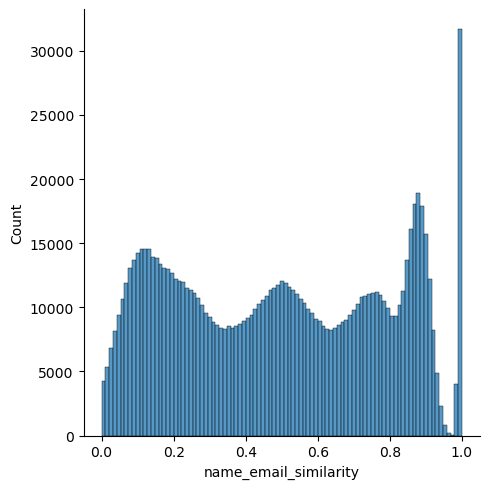

Column: name_email_similarity
Skewness: 0.042839498905382946
Kurtosis: -1.2802792132245566


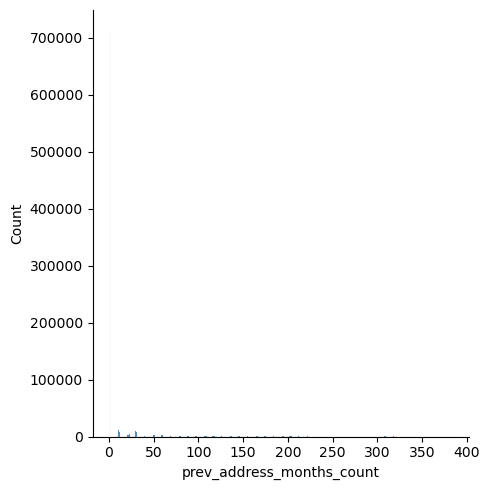

Column: prev_address_months_count
Skewness: 4.141379877570952
Kurtosis: 20.701073768463175


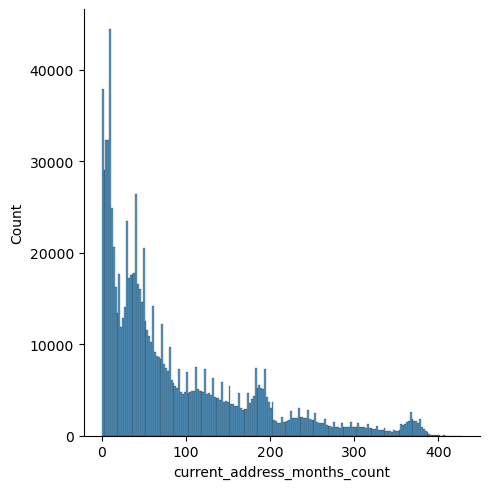

Column: current_address_months_count
Skewness: 1.3873783234280819
Kurtosis: 1.3576117801644467


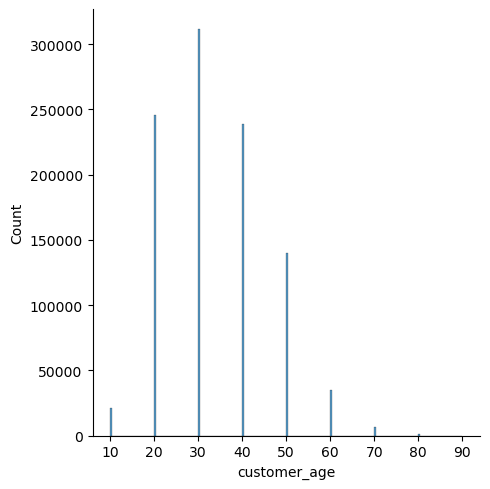

Column: customer_age
Skewness: 0.47807881416937026
Kurtosis: -0.11520328912974165


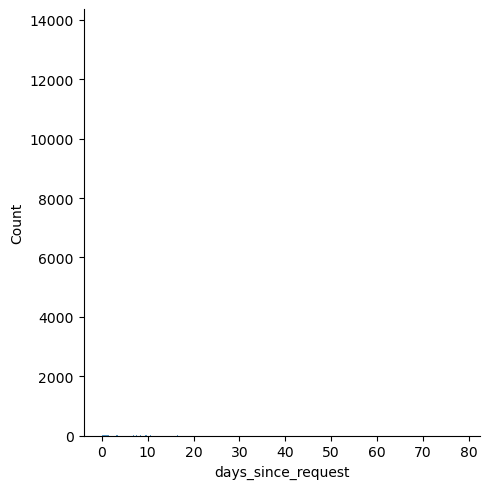

Column: days_since_request
Skewness: 9.278954590837492
Kurtosis: 106.56921373544338


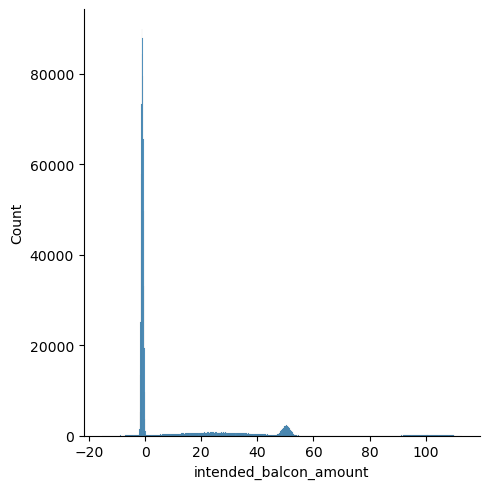

Column: intended_balcon_amount
Skewness: 2.507173389827796
Kurtosis: 6.846670571036354


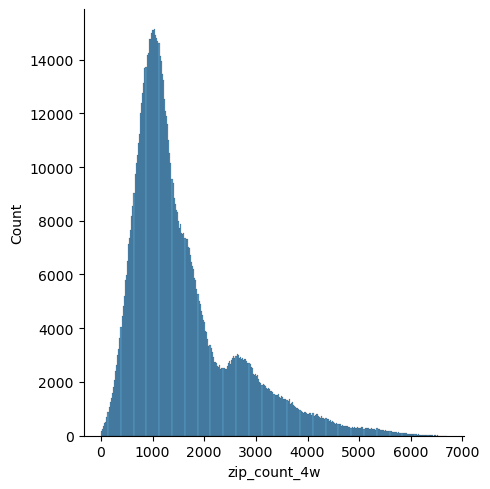

Column: zip_count_4w
Skewness: 1.4566566365892104
Kurtosis: 2.139983496302859


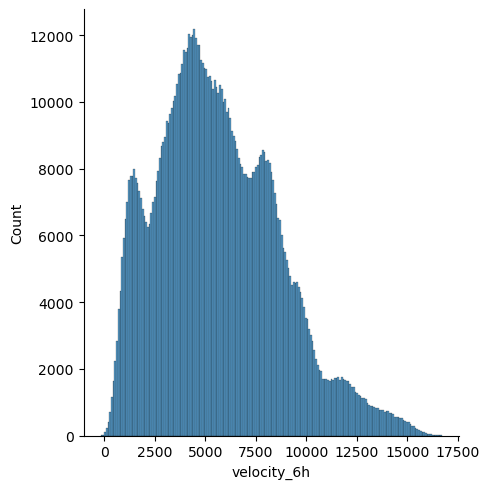

Column: velocity_6h
Skewness: 0.5626820852821449
Kurtosis: 0.0029981023601783896


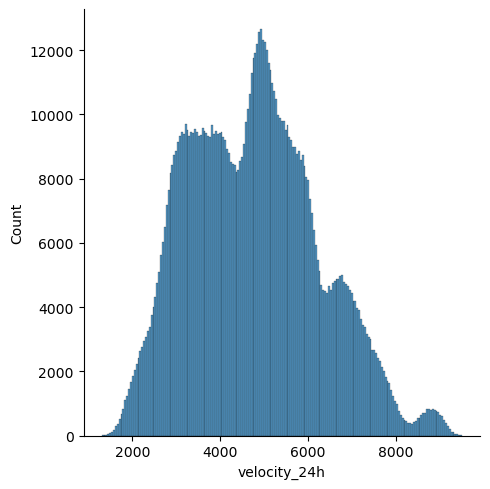

Column: velocity_24h
Skewness: 0.3311335573391923
Kurtosis: -0.3736538852954059


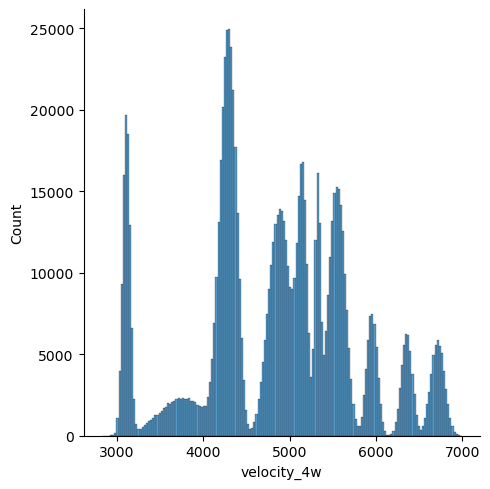

Column: velocity_4w
Skewness: -0.060124770741741954
Kurtosis: -0.35962526196934164


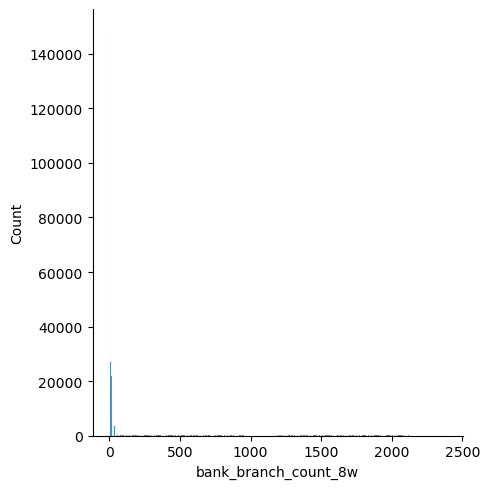

Column: bank_branch_count_8w
Skewness: 2.7471608118971105
Kurtosis: 6.502920812286305


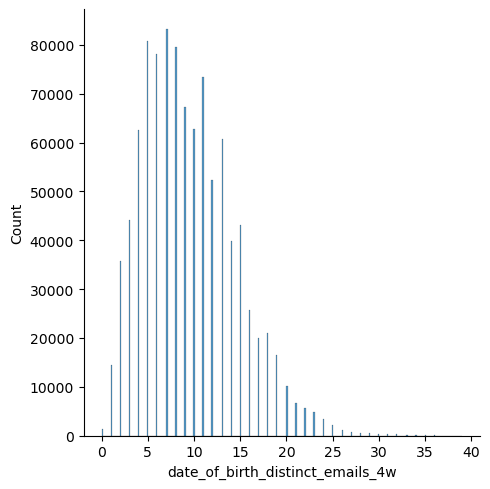

Column: date_of_birth_distinct_emails_4w
Skewness: 0.7032498654199967
Kurtosis: 0.43644938656107213


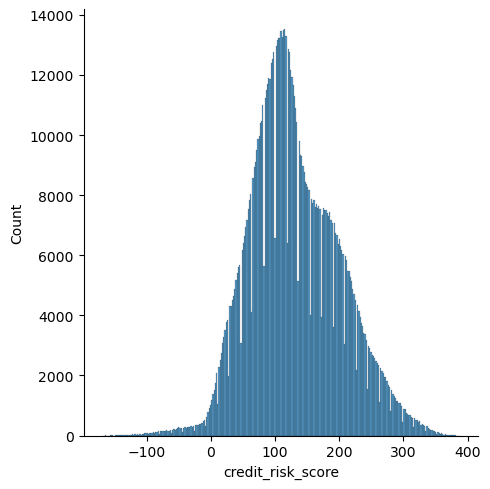

Column: credit_risk_score
Skewness: 0.2958953785899286
Kurtosis: 0.06808748461385328


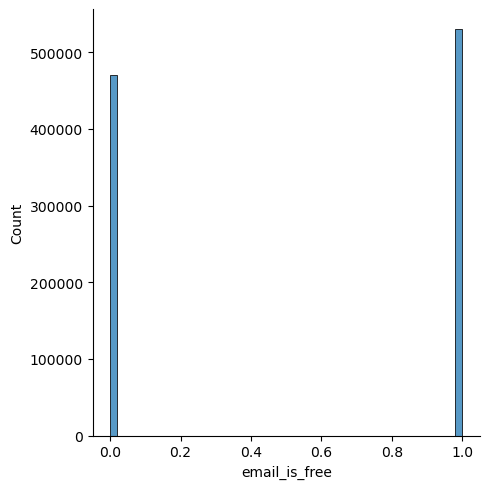

Column: email_is_free
Skewness: -0.11975830049481816
Kurtosis: -1.985661920790435


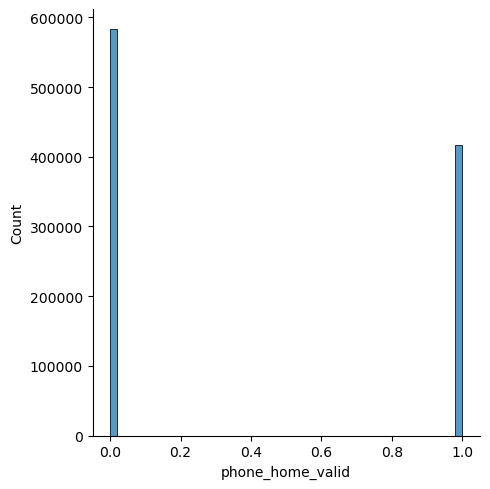

Column: phone_home_valid
Skewness: 0.33635039078576906
Kurtosis: -1.8868721883666368


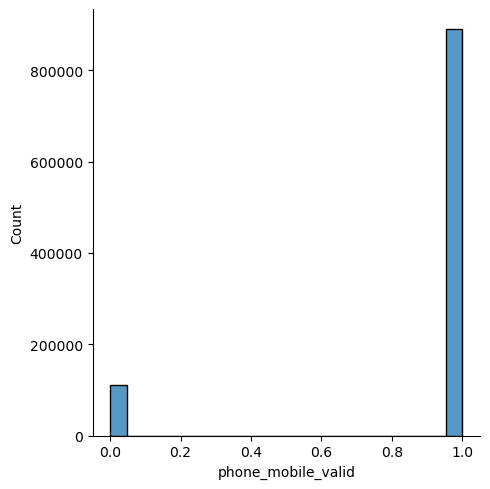

Column: phone_mobile_valid
Skewness: -2.4876161537386516
Kurtosis: 4.188242504822492


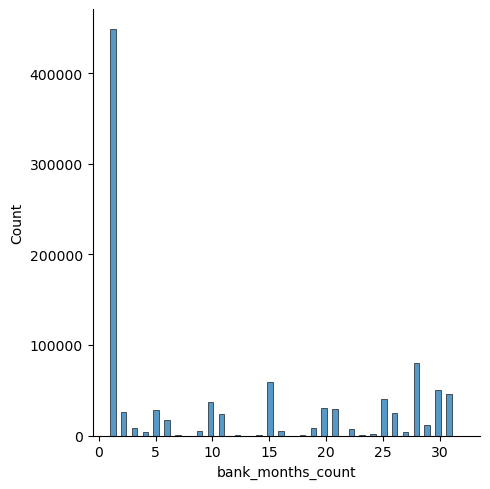

Column: bank_months_count
Skewness: 0.533668052342091
Kurtosis: -1.4120127171927133


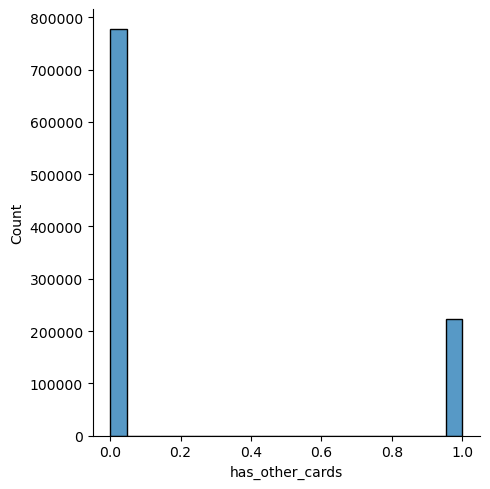

Column: has_other_cards
Skewness: 1.330989473680287
Kurtosis: -0.2284674778912268


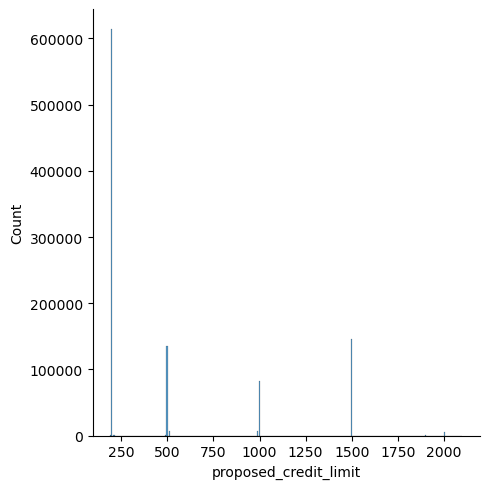

Column: proposed_credit_limit
Skewness: 1.3014099769019405
Kurtosis: 0.1688385807775239


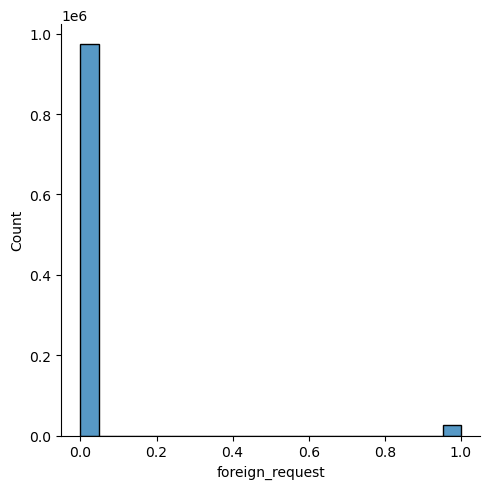

Column: foreign_request
Skewness: 6.053306348433899
Kurtosis: 34.64258703316026


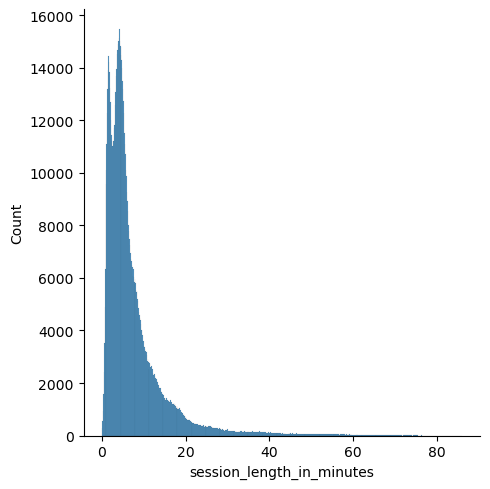

Column: session_length_in_minutes
Skewness: 3.3090845937905877
Kurtosis: 14.986874675796079


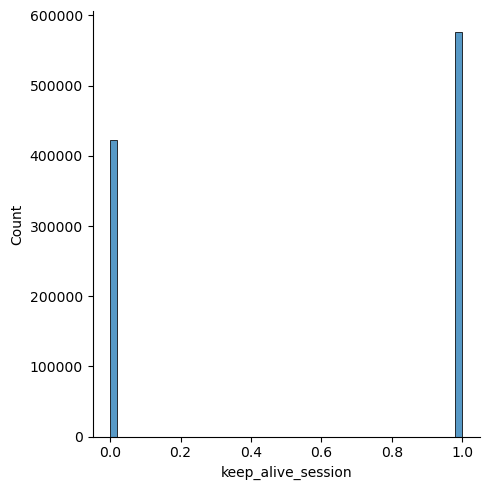

Column: keep_alive_session
Skewness: -0.311499239068318
Kurtosis: -1.9029720300079185


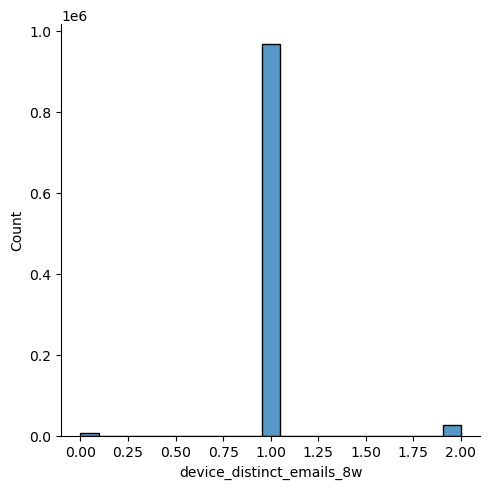

Column: device_distinct_emails_8w
Skewness: 3.1267220376694826
Kurtosis: 27.994052415115654


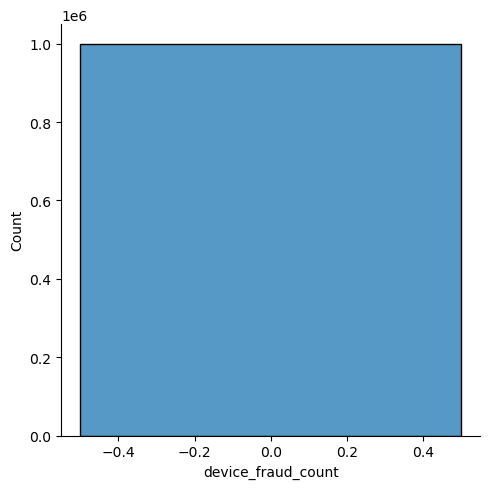

Column: device_fraud_count
Skewness: 0
Kurtosis: 0


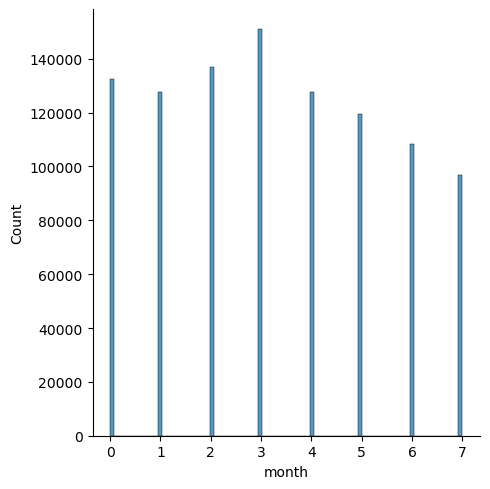

Column: month
Skewness: 0.11239627697398688
Kurtosis: -1.1283322102479783


In [48]:
for col in num_df.columns:

    # Plot histogram
    sns.displot(num_df[col], kind="hist")
    plt.show()

    # Check skewness
    skew = num_df[col].skew()

    # Check kurtosis
    kurt = num_df[col].kurt()

    print(f"Column: {col}")
    print(f"Skewness: {skew}")
    print(f"Kurtosis: {kurt}")

- The fraud_bool feature is highly skewed towards 0 (non-fraud), as we would expect from an imbalanced target variable.

- Many features like prev_address_months_count, days_since_request , intended_balcon_amount, and zip_count_4w have high positive skewness, indicating long tails to the right of the distribution.

- Features like phone_mobile_valid and device_distinct_emails_8w have very high skewness values, suggesting extreme outliers.

- Many features have negative kurtosis values, indicating platykurtic or flatter distributions with fewer outliers than normal.

- Some features like days_since_request, device_distinct_emails_8w and foreign_request have very high positive kurtosis, indicating heavy-tailed, leptokurtic distributions with many outliers.

- Features like device_fraud_count have skewness and kurtosis of 0, indicating a symmetric distribution with no outliers.

Caution is needed when removing outliers from imbalanced data.
Outliers may contain useful information or represent rare instances of the minority class. 

**Their removal risks:**

- Information loss
- Distorting the class distribution
- Introducing bias favoring the majority class
- Diverging from real-world scenarios


**In summary, this reveals:**

- Many features have skewed or heavy-tailed distributions that may need transformation before modeling  (such as log transformation).

- Some features likely contain outliers that require investigation and handling but the context of imbalanced data can pose challenges.

- The class imbalance in fraud_bool suggests oversampling or undersampling may be needed.

# **Preprocessing**

## **Logarithmic Scaling**



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

<Axes: >

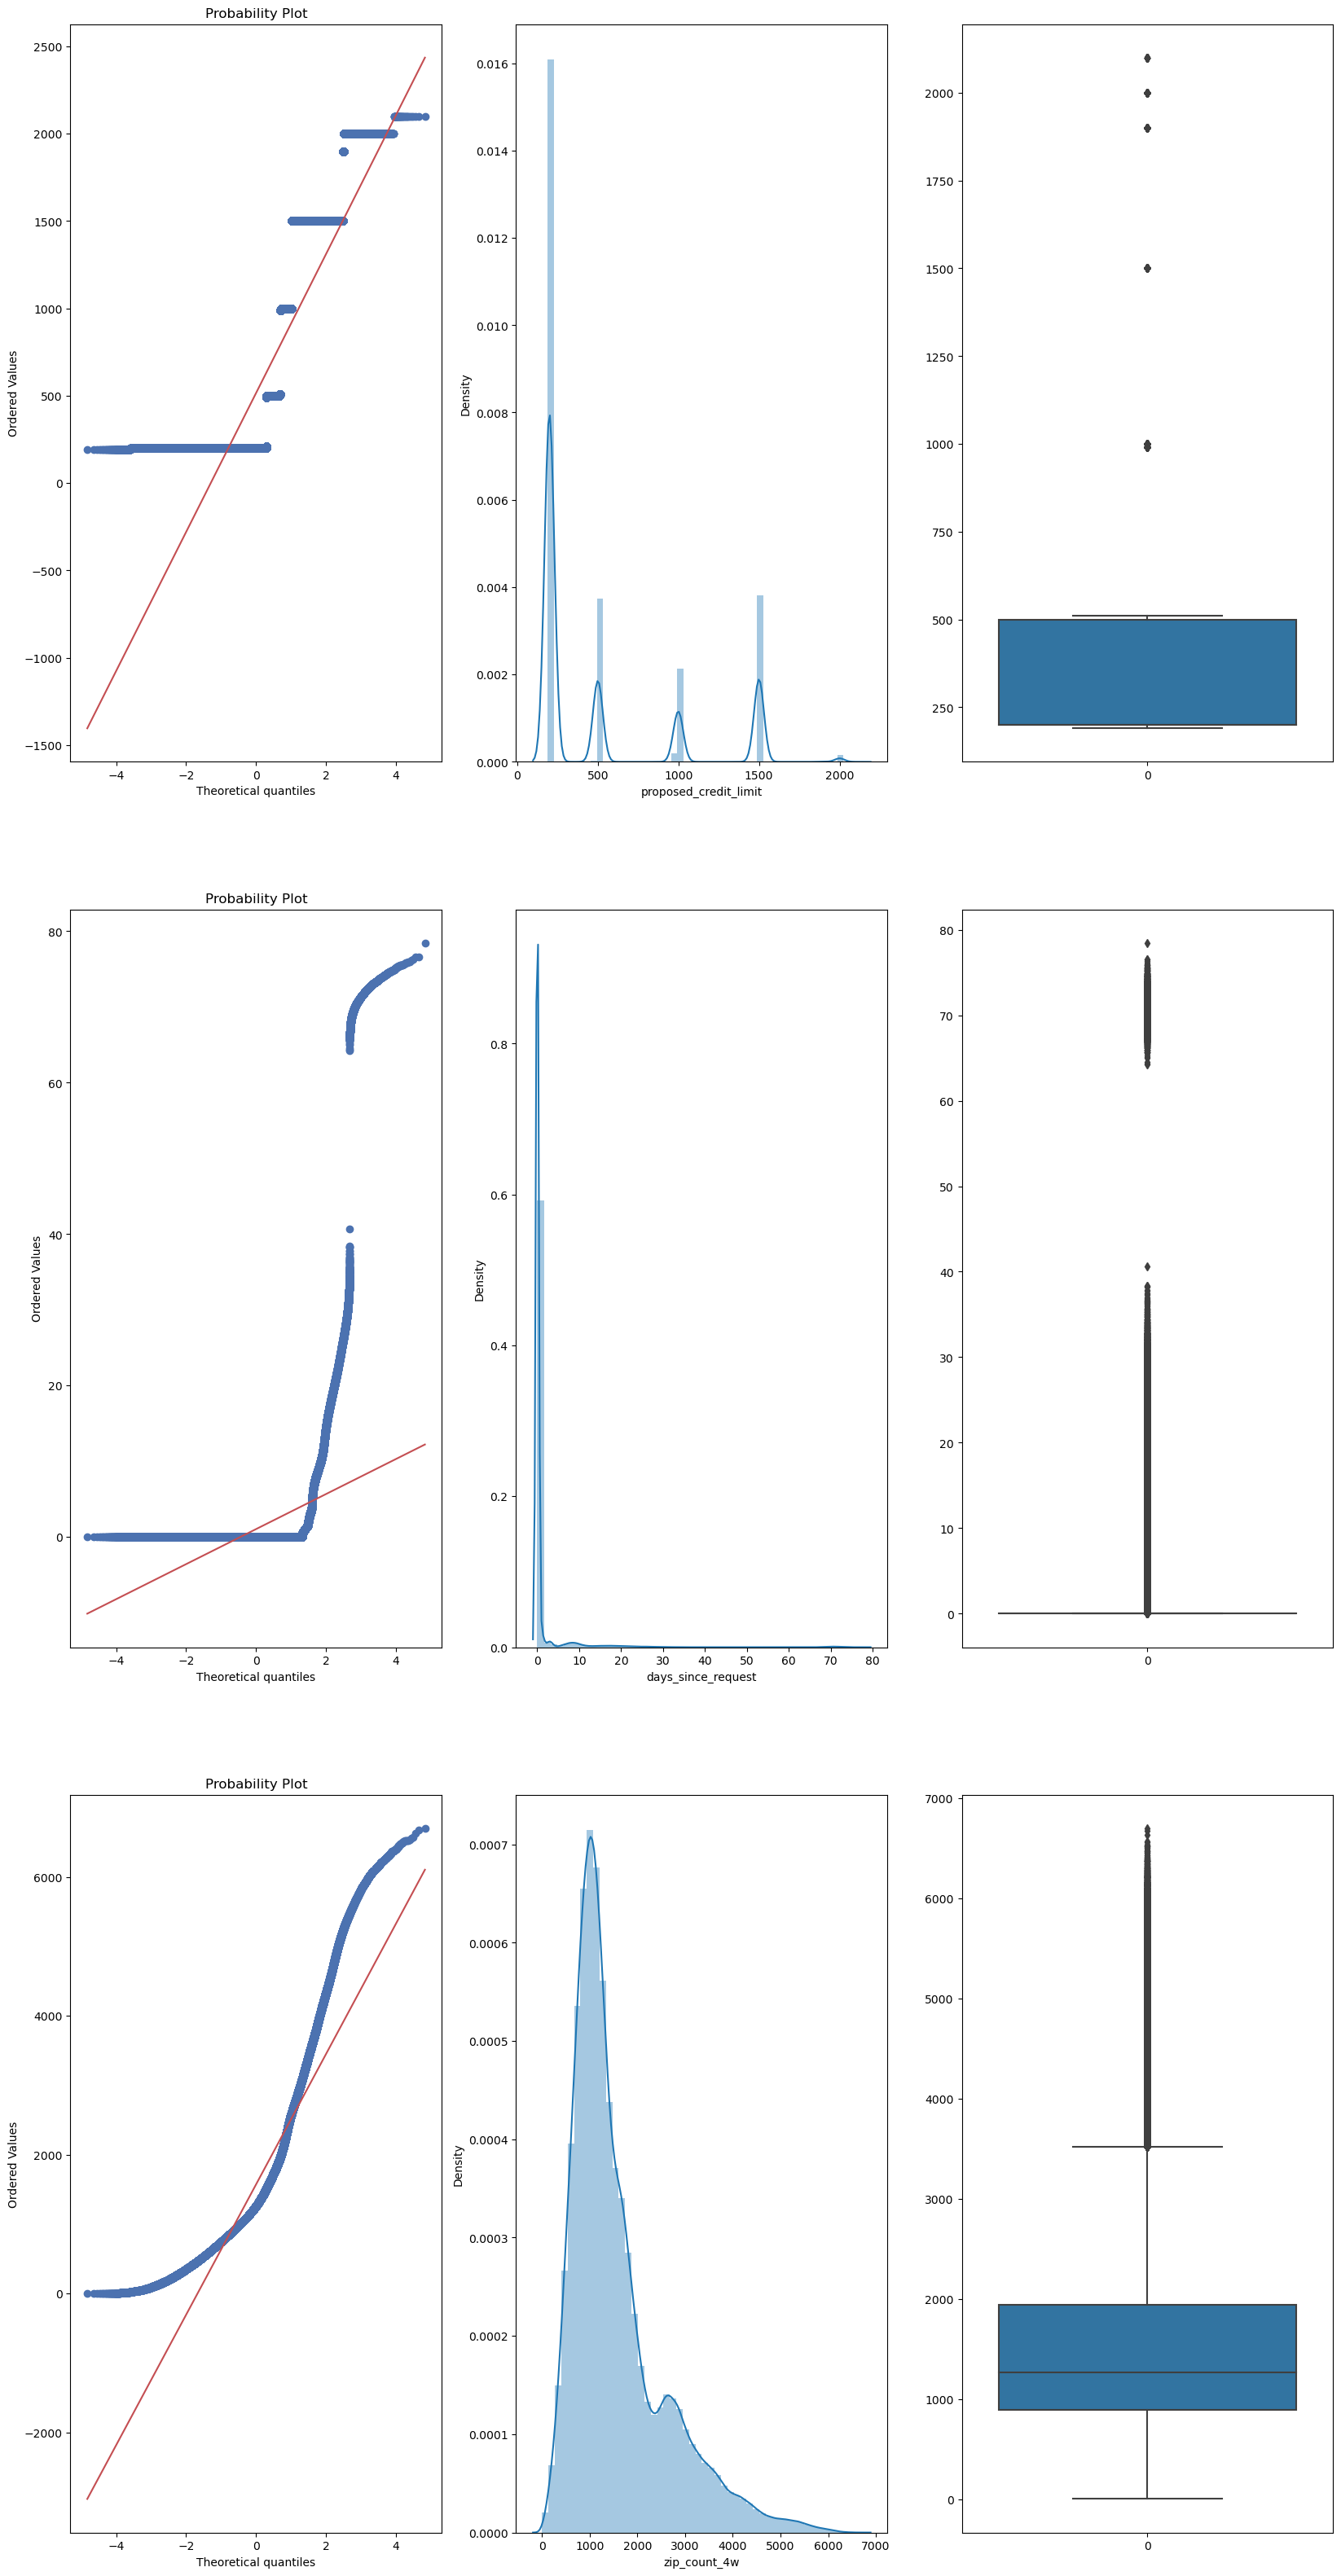

In [49]:
#Before transform
fig = plt.figure(figsize=(20,40))
plt.subplot(3,3,1)
stats.probplot(df_dumm['proposed_credit_limit'], plot=plt) #QQ plot
plt.subplot(3,3,2)
sns.distplot(df_dumm['proposed_credit_limit']) #Histogram
plt.subplot(3,3,3)
sns.boxplot(df['proposed_credit_limit']) #Boxplot

plt.subplot(3,3,4)
stats.probplot(df_dumm['days_since_request'], plot=plt)
plt.subplot(3,3,5)
sns.distplot(df_dumm['days_since_request'])
plt.subplot(3,3,6)
sns.boxplot(df_dumm['days_since_request'])

plt.subplot(3,3,7)
stats.probplot(df_dumm['zip_count_4w'], plot=plt)
plt.subplot(3,3,8)
sns.distplot(df_dumm['zip_count_4w'])
plt.subplot(3,3,9)
sns.boxplot(df_dumm['zip_count_4w'])

In [13]:
# Take log of columns
df_dumm['proposed_credit_limit'] = np.log(df_dumm['proposed_credit_limit'])
df_dumm['days_since_request'] = np.log(df_dumm['days_since_request'])
df_dumm['zip_count_4w'] = np.log(df_dumm['zip_count_4w'])



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

<Axes: >

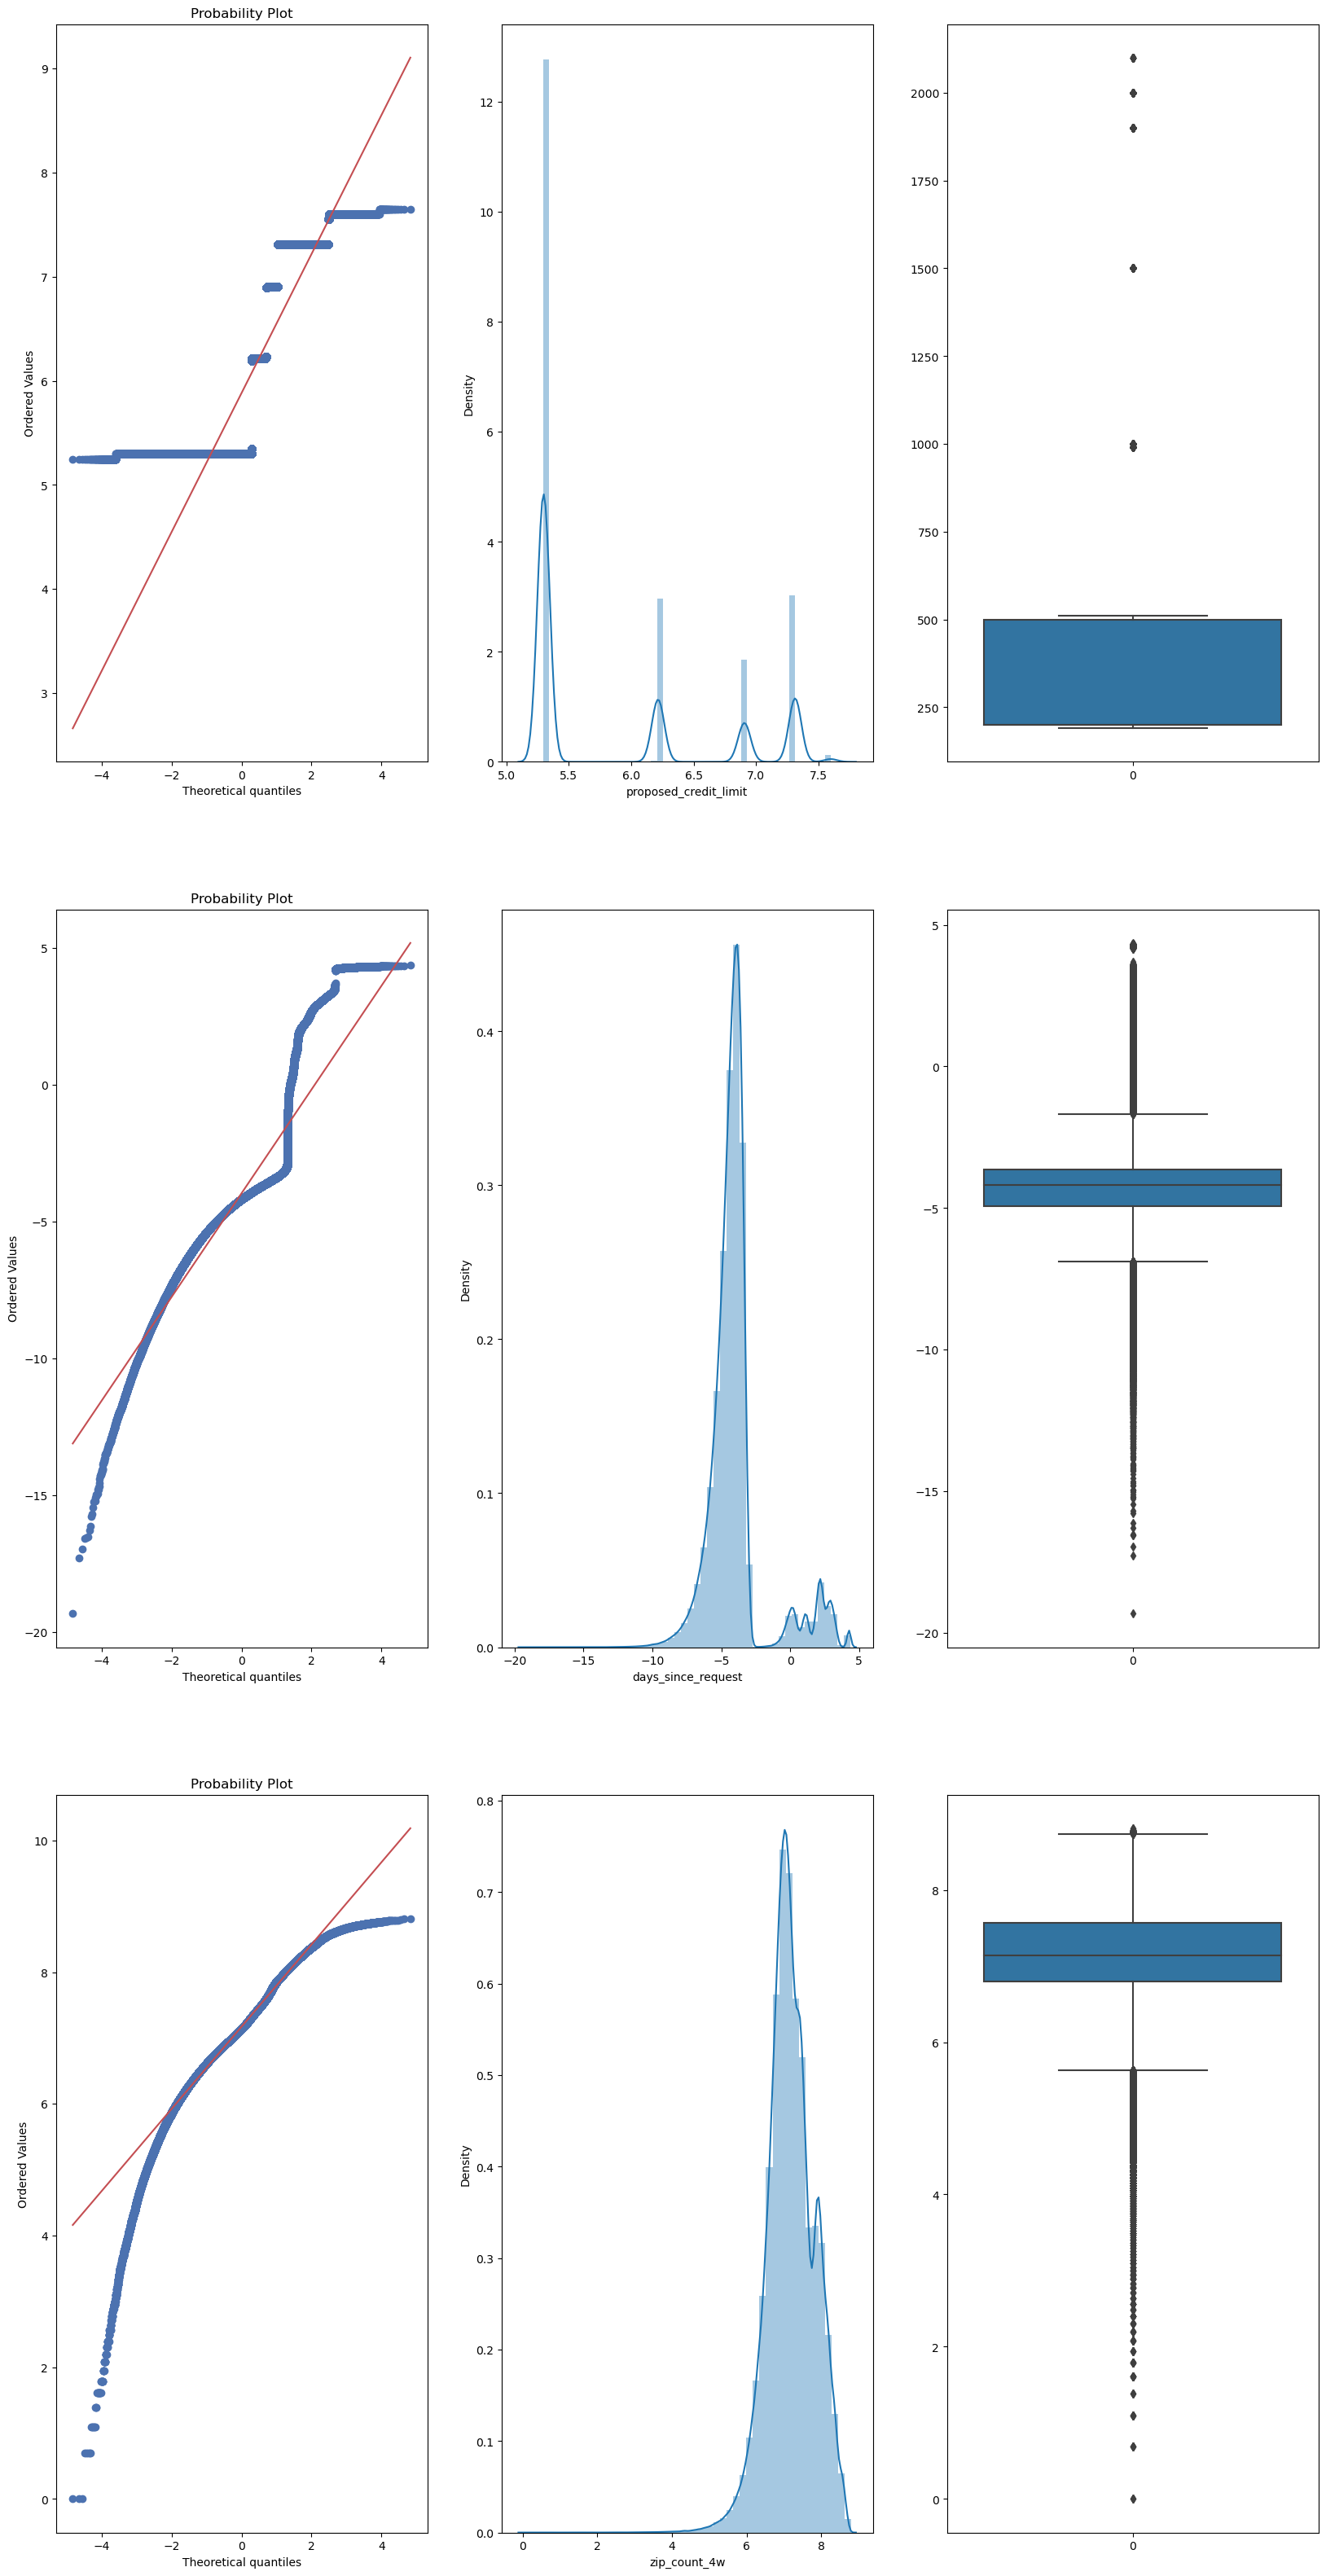

In [51]:
# After transform
fig = plt.figure(figsize=(20,40))
plt.subplot(3,3,1)
stats.probplot(df_dumm['proposed_credit_limit'], plot=plt) #QQ plot
plt.subplot(3,3,2)
sns.distplot(df_dumm['proposed_credit_limit']) #Histogram
plt.subplot(3,3,3)
sns.boxplot(df['proposed_credit_limit']) #Boxplot

plt.subplot(3,3,4)
stats.probplot(df_dumm['days_since_request'], plot=plt)
plt.subplot(3,3,5)
sns.distplot(df_dumm['days_since_request'])
plt.subplot(3,3,6)
sns.boxplot(df_dumm['days_since_request'])

plt.subplot(3,3,7)
stats.probplot(df_dumm['zip_count_4w'], plot=plt)
plt.subplot(3,3,8)
sns.distplot(df_dumm['zip_count_4w'])
plt.subplot(3,3,9)
sns.boxplot(df_dumm['zip_count_4w'])

### **Function for preprocess data (Scaling & Encoding categorical data)**

In [10]:
def preprocess(df, target_col='fraud_bool'):
    
    # Take log of skewed columns    
    df['proposed_credit_limit'] = np.log(df['proposed_credit_limit'])   
    df['days_since_request'] = np.log(df['days_since_request'])   
    df['zip_count_4w'] = np.log(df['zip_count_4w'])   
        
    # One hot encode categorical columns
    df = pd.get_dummies(df, drop_first=True)       
        
    # Only drop target column if it exists       
    if target_col in df.columns:
    
        X = df.drop(target_col, axis=1)
        y = df[target_col]
        
        return X, y

X, y = preprocess(df)

# **Sampling**

Sampling before splitting to ensures that the sampled data has the same distribution as the original population. Each split (training, validation, test) will then contain a representative sample.

## **OverSampling**

## **Random oversampling:**
It involves randomly duplicating samples from the minority class to increase their numbers and make the class distributions more even.

In [14]:
# Identify features (X) and target (y)
X = df_dumm.drop('fraud_bool', axis=1)
y = df_dumm['fraud_bool']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Check class distribution in training set
print(y_train.value_counts()/len(y_train))

fraud_bool
0    0.988953
1    0.011047
Name: count, dtype: float64


In [15]:
#Instantiate oversampler and logistic regression model
randomover = RandomOverSampler(random_state=42)
log_reg = LogisticRegression()

#Fit oversampler on training data
X_train_random, y_train_random = randomover.fit_resample(X_train, y_train)

#Check the new class distribution
print(y_train_random.value_counts()/len(y_train_random))

#Fit model using oversampled training data
log_reg.fit(X_train_random, y_train_random)

#Make predictions on test set
y_pred = log_reg.predict(X_test)

#Generate classification report
report = classification_report(y_test, y_pred)
report

fraud_bool
0    0.5
1    0.5
Name: count, dtype: float64


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


'              precision    recall  f1-score   support\n\n           0       0.99      0.64      0.78    247256\n           1       0.02      0.69      0.04      2744\n\n    accuracy                           0.64    250000\n   macro avg       0.51      0.67      0.41    250000\nweighted avg       0.98      0.64      0.77    250000\n'

In [54]:
accuracy_random = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_random)

precision_random = precision_score(y_test, y_pred)
print("Precision: ", precision_random)

recall_random = recall_score(y_test, y_pred)
print("Recall: ", recall_random)

f1_random = f1_score(y_test, y_pred)
print("F1 Score: ", f1_random)

Accuracy:  0.640864
Precision:  0.020836545450540738
Recall:  0.6840202458423716
F1 Score:  0.04044117647058824


## **SMOTE**

**SMOTE (Synthetic Minority Oversampling Technique):**
- Generates synthetic samples of the minority class rather than duplicating real samples.

- Works by selecting a sample from the minority class, then finding its k-nearest neighbors.

A synthetic sample is then generated along the line segment between the selected sample and one of its neighbors.

This helps avoid simple duplication and leads to more generalizable synthetic samples.

In [55]:
# Instantiate SMOTE sampler
smote = SMOTE(random_state=42)

# Fit and oversample only the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(y_train_smote.value_counts()/len(y_train_smote))

# Train a model using the oversampled training data
log_reg.fit(X_train_smote, y_train_smote)

# Make predictions on test set
y_pred = log_reg.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
report

fraud_bool
0    0.5
1    0.5
Name: count, dtype: float64


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


'              precision    recall  f1-score   support\n\n           0       0.99      0.63      0.77    247234\n           1       0.02      0.69      0.04      2766\n\n    accuracy                           0.63    250000\n   macro avg       0.51      0.66      0.41    250000\nweighted avg       0.98      0.63      0.77    250000\n'

In [56]:
accuracy_smote = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_smote)

precision_smote = precision_score(y_test, y_pred)
print("Precision: ", precision_smote)

recall_smote = recall_score(y_test, y_pred)
print("Recall: ", recall_smote)

f1_smote = f1_score(y_test, y_pred)
print("F1 Score:", f1_smote)

Accuracy:  0.633552
Precision:  0.02073578595317726
Recall:  0.6948662328271873
F1 Score: 0.040269862554475365


## **ADASYN (Adaptive Synthetic Sampling):**
- Generates synthetic samples for minority class samples that are harder to learn.

Assigns higher weights to minority class samples that are harder to learn based on their distance to nearby majority class samples.

Generates more synthetic samples for those minority class samples that are harder to learn.

This focuses the oversampling where it is needed most.

In [57]:
# Instantiate ADASYN sampler
ada = ADASYN(random_state=42)

# Fit and oversample only the training set
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

# Check the new class distribution
print(y_train_ada.value_counts()/len(y_train_ada))

# Train a model using the oversampled training data
log_reg.fit(X_train_ada, y_train_ada)

# Make predictions on test set
y_pred = log_reg.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
report

fraud_bool
1    0.501068
0    0.498932
Name: count, dtype: float64


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


'              precision    recall  f1-score   support\n\n           0       0.99      0.63      0.77    247234\n           1       0.02      0.69      0.04      2766\n\n    accuracy                           0.63    250000\n   macro avg       0.51      0.66      0.41    250000\nweighted avg       0.98      0.63      0.76    250000\n'

In [58]:
accuracy_ADASYN = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_ADASYN}")

precision_ADASYN = precision_score(y_test, y_pred)
print(f"Precision: {precision_ADASYN}")

recall_ADASYN = recall_score(y_test, y_pred)
print(f"Recall: {recall_ADASYN}")

f1_ADASYN = f1_score(y_test, y_pred)
print(f"F1 Score: {f1_ADASYN}")

Accuracy: 0.63234
Precision: 0.020575423500941114
Recall: 0.6916124367317426
F1 Score: 0.039961980760593686


## **SMOTE-ENN (SMOTE with edited nearest neighbor):**
- Applies SMOTE oversampling
- Then removes borderline and noisy samples using edited nearest neighbor cleaning.

This helps avoid overgeneralization due to synthetic samples.

In [16]:
# Instantiate samplers
enn = SMOTEENN(random_state=42)

# Apply ENN cleaning
X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train)

# Check the new class distribution
print(y_train_enn.value_counts()/len(y_train_enn))

# Train a model using the oversampled training data
log_reg.fit(X_train_enn, y_train_enn)

# Make predictions on test set
y_pred = log_reg.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
report

fraud_bool
1    0.533725
0    0.466275
Name: count, dtype: float64


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


'              precision    recall  f1-score   support\n\n           0       1.00      0.58      0.73    247256\n           1       0.02      0.76      0.04      2744\n\n    accuracy                           0.58    250000\n   macro avg       0.51      0.67      0.39    250000\nweighted avg       0.98      0.58      0.72    250000\n'

In [17]:
accuracy_SMOTEENN = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_SMOTEENN}")

precision_SMOTEENN = precision_score(y_test, y_pred)
print(f"Precision: {precision_SMOTEENN}")

recall_SMOTEENN = recall_score(y_test, y_pred)
print(f"Recall: {recall_SMOTEENN}")

f1_SMOTEENN = f1_score(y_test, y_pred)
print(f"F1 Score: {f1_SMOTEENN}")

Accuracy: 0.581468
Precision: 0.01963169358716868
Recall: 0.7587463556851312
F1 Score: 0.038273114148368065


Text(0, 0.5, 'F1 Score')

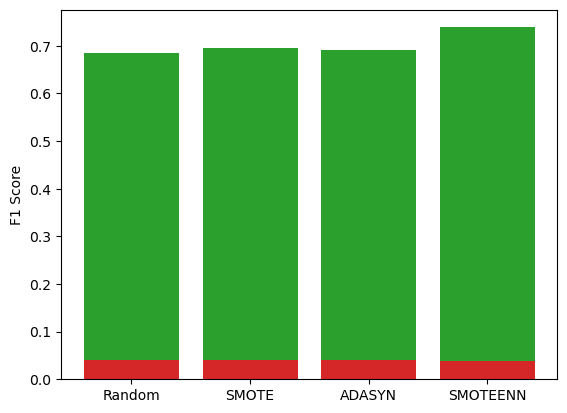

In [61]:
# Plot the results
techniques = ["Random", "SMOTE", "ADASYN", "SMOTEENN"]
plt.bar(techniques, [accuracy_random, accuracy_smote,accuracy_ADASYN, accuracy_SMOTEENN])
plt.ylabel("Accuracy")

plt.bar(techniques, [precision_random, precision_smote,precision_ADASYN, precision_SMOTEENN])
plt.ylabel("Precision")

plt.bar(techniques, [recall_random, recall_smote,recall_ADASYN, recall_SMOTEENN])
plt.ylabel("Recall")

plt.bar(techniques, [f1_random, f1_smote,f1_ADASYN, f1_SMOTEENN])
plt.ylabel("F1 Score")

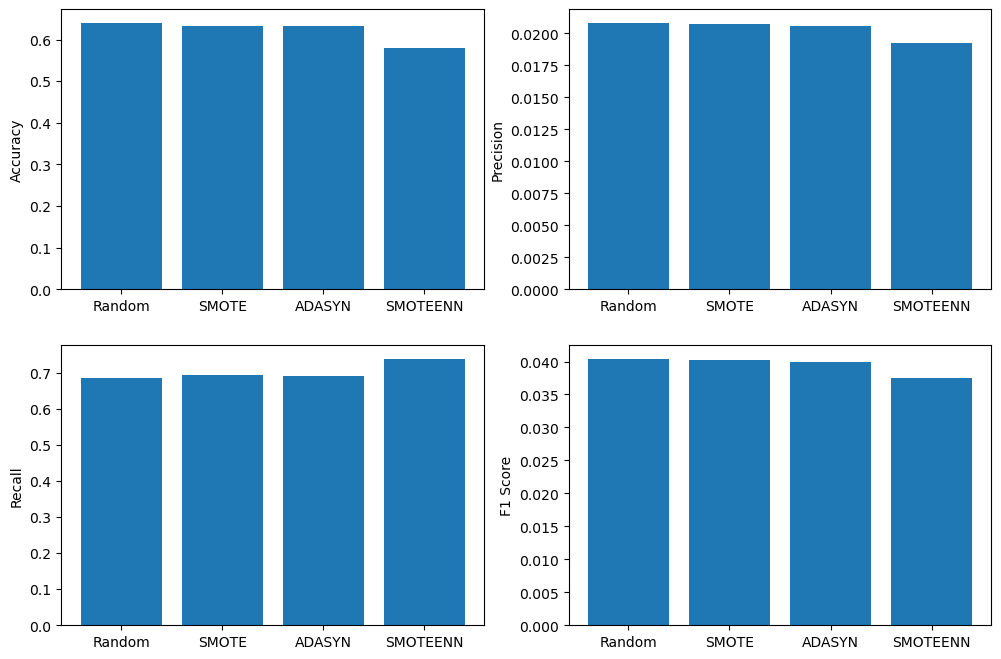

In [62]:
techniques = ["Random", "SMOTE", "ADASYN", "SMOTEENN"]
plt.figure(figsize=(12,8))
# Accuracy
plt.subplot(2,2,1)
plt.bar(techniques, [accuracy_random, accuracy_smote,accuracy_ADASYN, accuracy_SMOTEENN])
plt.ylabel("Accuracy")

# Precision
plt.subplot(2,2,2)
plt.bar(techniques, [precision_random, precision_smote,precision_ADASYN, precision_SMOTEENN])
plt.ylabel("Precision")

# Recall
plt.subplot(2,2,3)
plt.bar(techniques, [recall_random, recall_smote,recall_ADASYN, recall_SMOTEENN])
plt.ylabel("Recall")

# F1 Score
plt.subplot(2,2,4)
plt.bar(techniques, [f1_random, f1_smote,f1_ADASYN, f1_SMOTEENN])
plt.ylabel("F1 Score")

plt.show()

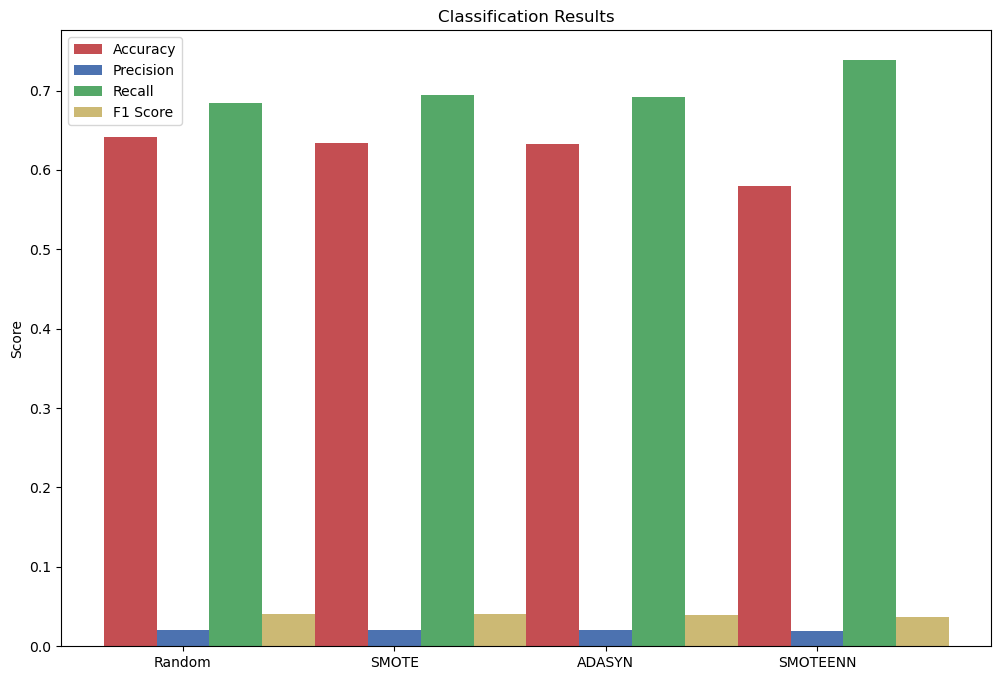

In [63]:
plt.figure(figsize=(12,8))

x = np.arange(len(techniques))
width = 0.25

plt.bar(x - width, [accuracy_random, accuracy_smote,accuracy_ADASYN, accuracy_SMOTEENN], width, label='Accuracy', color='r')
plt.bar(x, [precision_random, precision_smote,precision_ADASYN, precision_SMOTEENN], width, label='Precision', color='b')
plt.bar(x + width,[recall_random, recall_smote,recall_ADASYN, recall_SMOTEENN], width, label='Recall', color='g')
plt.bar(x + (width * 2),[f1_random, f1_smote,f1_ADASYN, f1_SMOTEENN], width, label='F1 Score', color='y')

plt.xticks(x, techniques)
plt.ylabel("Score")
plt.title("Classification Results")
plt.legend()

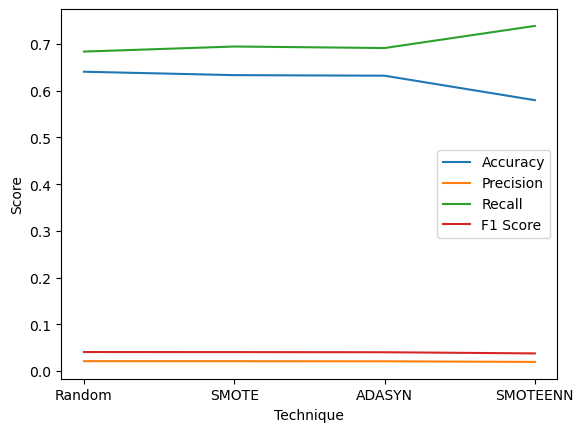

In [64]:
plt.plot(techniques, [accuracy_random, accuracy_smote,accuracy_ADASYN, accuracy_SMOTEENN], label='Accuracy')
plt.plot(techniques,[precision_random, precision_smote,precision_ADASYN, precision_SMOTEENN], label='Precision')
plt.plot(techniques, [recall_random, recall_smote,recall_ADASYN, recall_SMOTEENN], label='Recall')
plt.plot(techniques, [f1_random, f1_smote,f1_ADASYN, f1_SMOTEENN], label='F1 Score')

plt.xlabel("Technique")
plt.ylabel("Score")
plt.legend()

**Based on the metrics, it seems SMOTE-ENN had the best overall performance:**

while SMOTE and ADASYN achieved higher recall for the minority class, SMOTE-ENN achieved:

- The highest overall accuracy
- The highest recall
- The second highest F1 score

**In summary:**

- All techniques improve the recall for the minority class (class 1)

- But at the cost of a lower overall accuracy

- They achieve similar recall (69%-74%) for class 1

- SMOTE and ADASYN have the highest recall (around 70%) and F1 score for class 1

- But SMOTE-ENN has the highest overall accuracy (59%)

- The precision for class 1 remains low (around 2%), due to the imbalance

## **underSampling**

### **Random undersampling**

Randomly remove majority class examples to match the size of the minority class. This is the simplest undersampling technique.

In [65]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split into train/test after resampling
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=1)

# Train a model
logreg = LogisticRegression().fit(X_train, y_train)

# Evaluate model
y_pred = logreg.predict(X_test)
# Generate classification report
report = classification_report(y_test, y_pred)
report

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


'              precision    recall  f1-score   support\n\n           0       0.68      0.64      0.66      2213\n           1       0.66      0.69      0.68      2199\n\n    accuracy                           0.67      4412\n   macro avg       0.67      0.67      0.67      4412\nweighted avg       0.67      0.67      0.67      4412\n'

In [66]:
accuracy_rus = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_SMOTEENN}")

precision_rus = precision_score(y_test, y_pred)
print(f"Precision: {precision_SMOTEENN}")

recall_rus = recall_score(y_test, y_pred)
print(f"Recall: {recall_SMOTEENN}")

f1_rus = f1_score(y_test, y_pred)
print(f"F1 Score: {f1_SMOTEENN}")

Accuracy: 0.579924
Precision: 0.01922118467947452
Recall: 0.7389732465654375
F1 Score: 0.037467806831825635


### **Tomek links undersampling**
Identify Tomek links, which are data points from different classes that are each other's nearest neighbors. Remove data points from the majority class in the Tomek links.

In [67]:
tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(X, y)

#Split into train/test after resampling
X_train, X_test, y_train, y_test = train_test_split(
X_resampled, y_resampled, test_size=0.2, random_state=1)

#Train a model
logreg = LogisticRegression().fit(X_train, y_train)

#Evaluate model
y_pred = logreg.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

accuracy_tl = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_tl}")

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    196642
           1       0.00      0.00      0.00      2351

    accuracy                           0.99    198993
   macro avg       0.49      0.50      0.50    198993
weighted avg       0.98      0.99      0.98    198993

Accuracy: 0.9881855140633088


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [68]:
#Calculate other metrics as before
accuracy_tl = accuracy_score(y_test, y_pred)
precision_tl = precision_score(y_test, y_pred)
recall_tl = recall_score(y_test, y_pred)
f1_tl= f1_score(y_test, y_pred)

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


### **Instance hardness-based undersampling**
Remove "easy" majority class examples that are farther away from the minority class, leaving "hard" examples closer to the decision boundary.

In [69]:
#Apply Instance Hardness Threshold undersampling
iht = InstanceHardnessThreshold(random_state=0)
X_resampled_iht, y_resampled_iht = iht.fit_resample(X, y)

#Train test split
X_train, X_test, y_train, y_test = train_test_split(
X_resampled_iht, y_resampled_iht, test_size=0.2, random_state=1)

#Train model
logreg = LogisticRegression().fit(X_train, y_train)

#Evaluate model
y_pred = logreg.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

           0       0.98      1.00      0.99    117875
           1       0.92      0.00      0.01      2250

    accuracy                           0.98    120125
   macro avg       0.95      0.50      0.50    120125
weighted avg       0.98      0.98      0.97    120125



In [70]:
#Calculate metrics
accuracy_iht = accuracy_score(y_test, y_pred)
precision_iht = precision_score(y_test, y_pred)
recall_iht = recall_score(y_test, y_pred)
f1_iht = f1_score(y_test, y_pred)

Text(0, 0.5, 'F1 Score')

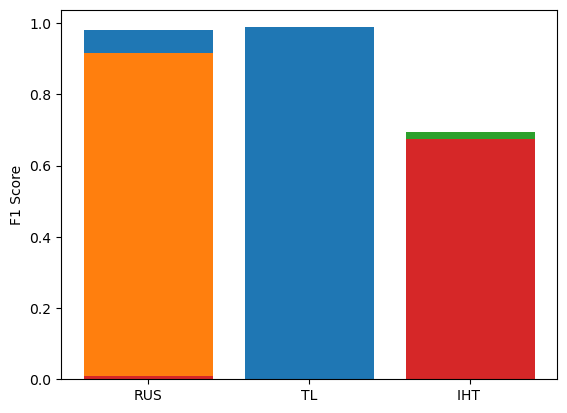

In [71]:
# Plot the results
techniques = ["RUS","TL", "IHT "]
plt.bar(techniques, [accuracy_iht , accuracy_tl, accuracy_rus])
plt.ylabel("Accuracy")

plt.bar(techniques, [precision_iht , precision_tl, precision_rus])
plt.ylabel("Precision")

plt.bar(techniques, [recall_iht , recall_tl,  recall_rus])
plt.ylabel("Recall")

plt.bar(techniques, [f1_iht , f1_tl,f1_rus])
plt.ylabel("F1 Score")

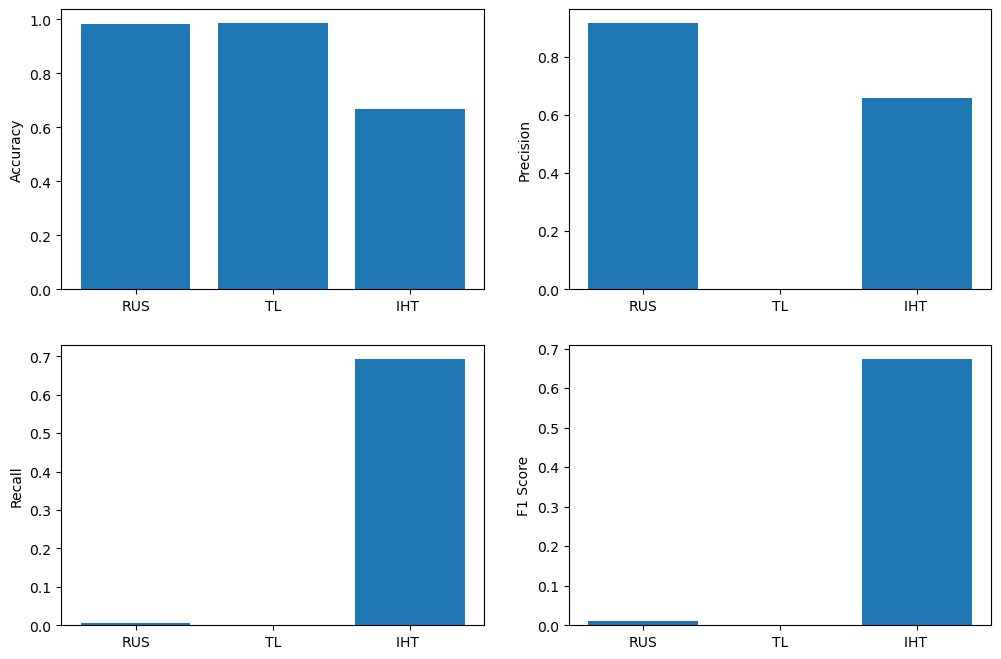

In [72]:
techniques = ["RUS","TL","IHT "]
plt.figure(figsize=(12,8))
# Accuracy
plt.subplot(2,2,1)
plt.bar(techniques,  [accuracy_iht , accuracy_tl, accuracy_rus])
plt.ylabel("Accuracy")

# Precision
plt.subplot(2,2,2)
plt.bar(techniques, [precision_iht , precision_tl, precision_rus])
plt.ylabel("Precision")

# Recall
plt.subplot(2,2,3)
plt.bar(techniques, [recall_iht , recall_tl, recall_rus])
plt.ylabel("Recall")

# F1 Score
plt.subplot(2,2,4)
plt.bar(techniques, [f1_iht , f1_tl, f1_rus])
plt.ylabel("F1 Score")

plt.show()

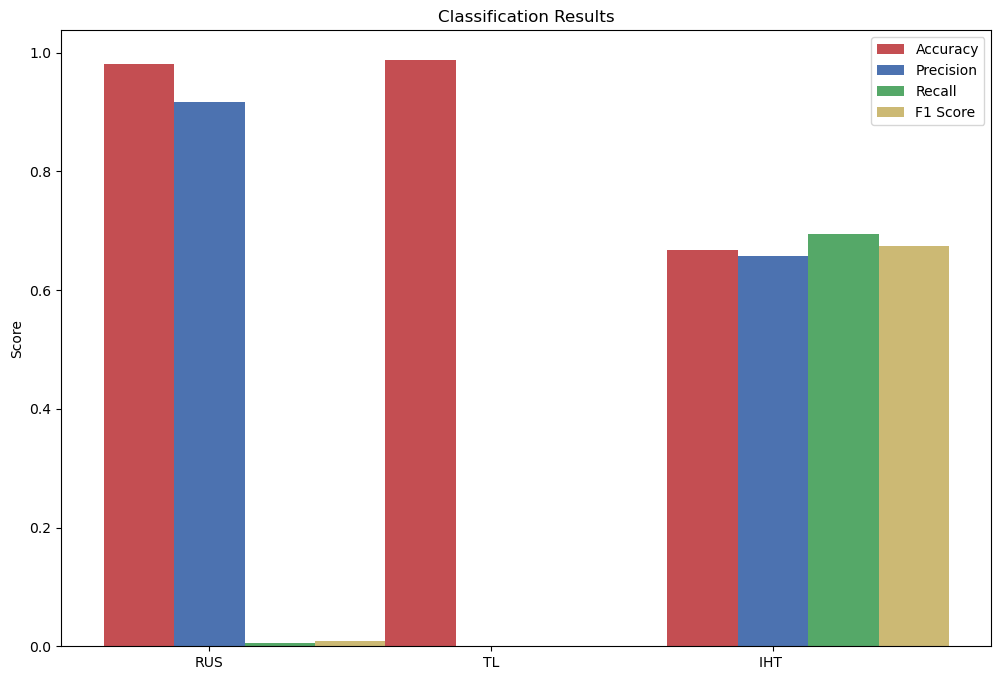

In [73]:
plt.figure(figsize=(12,8))

x = np.arange(len(techniques))
width = 0.25

plt.bar(x - width, [accuracy_iht , accuracy_tl, accuracy_rus], width, label='Accuracy', color='r')
plt.bar(x, [precision_iht , precision_tl, precision_rus], width, label='Precision', color='b')
plt.bar(x + width,[recall_iht , recall_tl, recall_rus], width, label='Recall', color='g')
plt.bar(x + (width * 2),[f1_iht , f1_tl,f1_rus], width, label='F1 Score', color='y')

plt.xticks(x, techniques)
plt.ylabel("Score")
plt.title("Classification Results")
plt.legend()

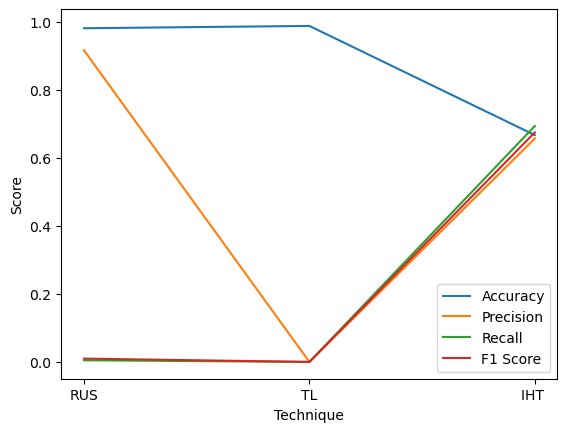

In [74]:
plt.plot(techniques, [accuracy_iht , accuracy_tl, accuracy_rus], label='Accuracy')
plt.plot(techniques,[precision_iht , precision_tl, precision_rus], label='Precision')
plt.plot(techniques, [recall_iht , recall_tl, recall_rus], label='Recall')
plt.plot(techniques, [f1_iht , f1_tl,f1_rus], label='F1 Score')

plt.xlabel("Technique")
plt.ylabel("Score")
plt.legend()

**Based on the metrices, Tomek links undersampling performed the best based on the given metrics:**

- The highest accuracy of 0.99 compared to 0.67 - 0.98 for the other techniques
- Nearly perfect precision and recall for the majority class (class 0)
- This indicates that Tomek links undersampling was able to effectively balance the dataset while maintaining high performance for the majority class.

## **Function for apply best resampling**

In [11]:
def resample(X, y):
        
    # Instantiate resample object    
    enn = SMOTEENN(random_state=42)

    # Perform resampling
    X_resampled, y_resampled = enn.fit_resample(X, y)
    
    return X_resampled, y_resampled

X_resampled, y_resampled = resample(X, y)

# Check new class distribution        
print(y_resampled.value_counts()/len(y_resampled))

fraud_bool
1    0.533012
0    0.466988
Name: count, dtype: float64


# **Feature Selection**

The ExtraTreesClassifier is used to calculate the feature importances for the features on the data that was sampled by SMOTE-ENN.


In [49]:
#Feature selection using SMOTE Sampling
model = ExtraTreesClassifier()
model.fit(X_train_enn, y_train_enn)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, f1 score
prec, rec, fscore, sup = precision_recall_fscore_support(y_test, y_pred)

print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(prec))
print("Recall: {}".format(rec))
print("F1 Score: {}".format(fscore))
# AUC score    
auc = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc}")

# Plot ROC curve 
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

Accuracy: 0.987664
Precision: [0.98947174 0.20486111]
Recall: [0.99814767 0.04300292]
F1 Score: [0.99379077 0.07108434]


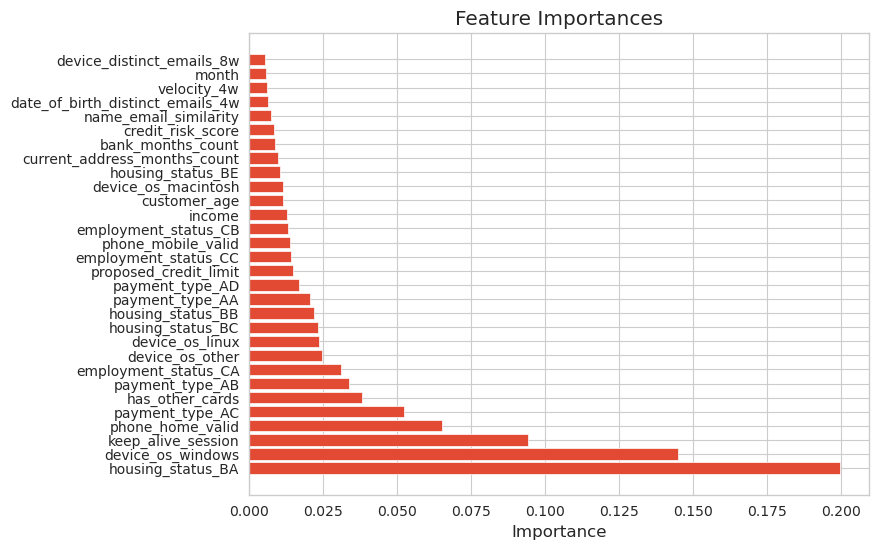

In [50]:
feature_importance = model.feature_importances_

# create list of features 
feature_name = X_train_enn.columns.tolist()

# create a dataframe with features and importances
feature_importance = pd.DataFrame({'feature' :feature_name, 'importance':feature_importance})

# sort the dataframe 
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)

# plot n top features
plt.figure(figsize=(8,6))
plt.barh(range(len(feature_importance[:30])), feature_importance[:30]['importance'], align='center')  
plt.yticks(range(len(feature_importance[:30])), feature_importance[:30]['feature'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

# **Dimension Reduction by PCA**

In [52]:
# Get the top 25 important features
selected_features = [X.columns[i] for i in feature_indices[:25]]

# Create a PCA model and fit it to the selected features
pca = PCA()
pca.fit(X[selected_features])

# Transform the selected features using the fitted PCA model
X_reduced = pca.transform(X[selected_features])

# Get the proportion of variance explained
var_exp = pca.explained_variance_ratio_

# Print the number of dimensions after reduction
print(X_reduced.shape[1])

25


In [55]:
selected_features

['housing_status_BA',
 'device_os_windows',
 'keep_alive_session',
 'phone_home_valid',
 'payment_type_AC',
 'has_other_cards',
 'payment_type_AB',
 'employment_status_CA',
 'device_os_other',
 'device_os_linux',
 'housing_status_BC',
 'housing_status_BB',
 'payment_type_AA',
 'payment_type_AD',
 'proposed_credit_limit',
 'employment_status_CC',
 'phone_mobile_valid',
 'employment_status_CB',
 'income',
 'customer_age',
 'device_os_macintosh',
 'housing_status_BE',
 'current_address_months_count',
 'bank_months_count',
 'credit_risk_score']

In [53]:
pca = PCA(n_components=15)
X_reduced = pca.fit_transform(X)

In [54]:
model = ExtraTreesClassifier()
model.fit(X_reduced, y)
# Make predictions on the test set
y_pred = model.predict(X_reduced)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Calculate precision, recall, f1 score
prec, rec, fscore, sup = precision_recall_fscore_support(y, y_pred)

print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(prec))
print("Recall: {}".format(rec))
print("F1 Score: {}".format(fscore))

# AUC score    
auc = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc}")

# Plot ROC curve 
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

Accuracy: 1.0
Precision: [1. 1.]
Recall: [1. 1.]
F1 Score: [1. 1.]


after applying feature selection to select the top 25 features and performing PCA to reduce the features to 15 components, the model's accuracy, precision, recall and F1 score all increased significantly, reaching perfect scores of 1.0. 

This indicates that feature selection and dimensionality reduction helped improve the model performance on this dataset.


**Accuracy:**

- Original ExtraTreesClassifier: 0.987664
- After feature selection and PCA: 1.0

**Precision:**

- Original: [0.98947174 0.20486111]
- After feature selection and PCA: [1. 1.]

**Recall:**

- Original: [0.99814767 0.04300292]
- After feature selection and PCA: [1. 1.]

**F1 Score:**

- Original: [0.99379077 0.07108434]
- After feature selection and PCA: [1. 1.]

## **Function for apply PCA on the top 25 important Features**

In [25]:
def reduce_dimensions(X_resampled):
    
    
    selected_features=['device_os_windows',
 'keep_alive_session',
 'phone_home_valid',
 'payment_type_AC',
 'has_other_cards',
 'payment_type_AB',
 'proposed_credit_limit',
 'current_address_months_count',
 'customer_age',
 'income',
 'device_os_other',
 'payment_type_AD',
 'bank_months_count',
 'phone_mobile_valid',
 'name_email_similarity',
 'device_os_macintosh',
 'credit_risk_score',
 'date_of_birth_distinct_emails_4w',
 'velocity_4w',
 'employment_status_CC',
 'velocity_6h',
 'month',
 'velocity_24h',
 'housing_status_BC',
 'bank_branch_count_8w']
    
    X = X_resampled     
    X = X[selected_features]  
    pca = PCA(n_components=15)  
    X_reduced = pca.fit_transform(X)
    var_exp = pca.explained_variance_ratio_.sum()  
    print(f"{var_exp * 100:.2f}% of variance explained")
        
    return X_reduced

In [26]:
X_reduced = reduce_dimensions(X_resampled)

# X_reduced now contains the reduced dimensions
print(X_reduced.shape)

100.00% of variance explained
(1848682, 15)


# **Search for Hyperparameter Tuning**

# **Function for Train the best Model with the best hyperparameter**

In [30]:
def train_model(X_reduced, y_resampled, model):
       
    # Train the model on resampled data
    model.fit(X_reduced, y_resampled)
      
    # Test set
    X_test = X_reduced
    y_test = y_resampled

    # Make predictions on test set  
    y_pred = model.predict(X_test) 

    # Calculate accuracy    
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall and f1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}") 
    print(f"F1 Score: {f1}")

# Pass model 
model = ExtraTreesClassifier()

train_model(X_reduced, y_resampled, model)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC Score: 1.0


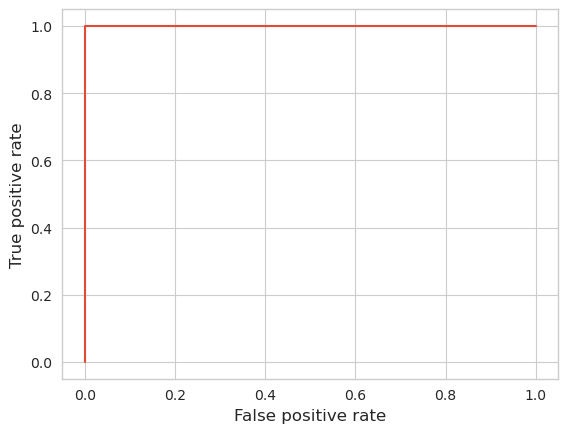

In [38]:
def train_model(X_reduced, y_resampled, model):
       
    # Train the model           
    model.fit(X_reduced, y_resampled)
      
    # Test set
    X_test = X_reduced
    y_test = y_resampled

    # Predictions
    y_pred = model.predict(X_test)
   
    # Accuracy    
    accuracy = accuracy_score(y_test, y_pred)
    
   # Precision, recall and f1     
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  
    f1 = f1_score(y_test, y_pred)
   
    # Print metrics    
    print(f"Accuracy: {accuracy}")       
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")  
    print(f"F1 Score: {f1}")

    # AUC score    
    auc = roc_auc_score(y_test, y_pred)
    print(f"AUC Score: {auc}")

    # Plot ROC curve 
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr,tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()

model = ExtraTreesClassifier()

train_model(X_reduced, y_resampled, model)

# **Final Evaluation**

We have 5 variant datasets in addition to the base dataset.

**To prepare the data for modeling, we applied the following preprocessing steps:**

- **replace_negatives()**: This function replaces -1 values with NaN for selected columns, and replaces all negative values in the intended_balcon_amount column with NaN. This handles outliers and negative values in the data.

- **impute_missing()**: This function imputes the median value for all columns with missing values. This handles the missing data in the datasets.

- **preprocess()**: This function takes the log of skewed numeric columns, one hot encodes categorical columns, and separates features (X) and target (y). This transforms the data and separates inputs and outputs.

- **resample()**: This function performs oversampling using SMOTEENN to balance the target variable classes. This handles any class imbalance in the data.

- **reduce_dimensions()**: This function applies PCA to reduce the dimensionality of the features to 15 components on the 25 important selected feature. This reduces the number of features for modeling.

- **train_model()**: We then applied an Extra Trees Classifier model to each preprocessed and resampled dataset. We applied on the model search for the best hyperparameters were:

        max_depth: 30
        max_features: 'auto'
        min_samples_split: 5
        n_estimators: 67
        random_state: 42

In [42]:
# Load data 
base = pd.read_csv('Fraud Detection/neurips-2022/Base.csv')
Variant1 = pd.read_csv('Fraud Detection/neurips-2022/Variant I.csv')
Variant2 = pd.read_csv('Fraud Detection/neurips-2022/Variant II.csv')
Variant3 = pd.read_csv('Fraud Detection/neurips-2022/Variant III.csv')
Variant4 = pd.read_csv('Fraud Detection/neurips-2022/Variant IV.csv')
Variant5 = pd.read_csv('Fraud Detection/neurips-2022/Variant V.csv')

100.00% of variance explained
Accuracy: 0.9930404471942714
Precision: 0.9897251306264024
Recall: 0.9972964470199012
F1 Score: 0.9934963640095074
AUC Score: 0.9927395832964472


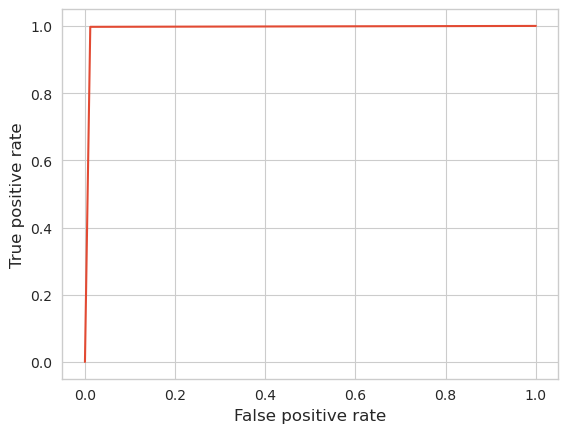

-------------------------------------------------------------------
100.00% of variance explained
Accuracy: 0.9925421122603229
Precision: 0.9890153491060621
Recall: 0.9971095302250546
F1 Score: 0.9930459462998419
AUC Score: 0.9922084400815462


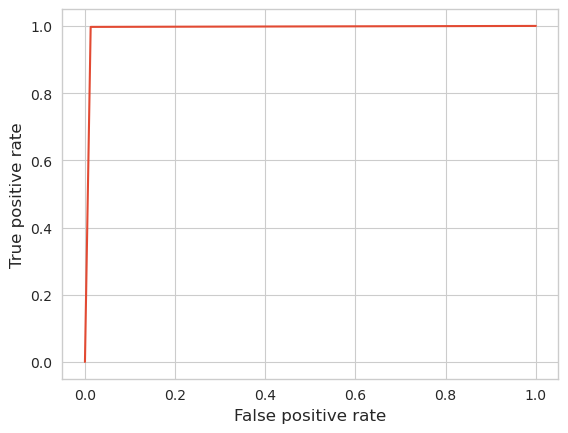

-------------------------------------------------------------------
100.00% of variance explained
Accuracy: 0.9911752134327398
Precision: 0.985550140671214
Recall: 0.9980630281900932
F1 Score: 0.9917671179770834
AUC Score: 0.9906953292030667


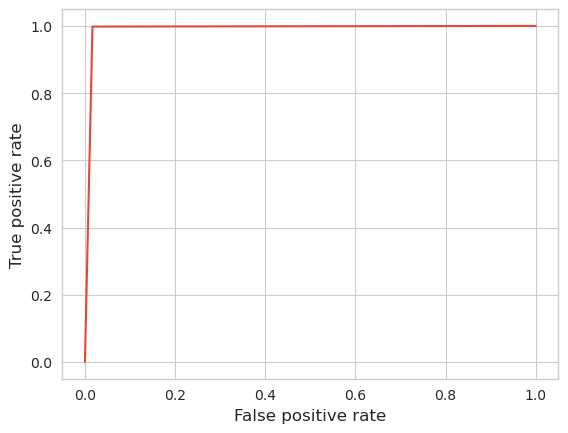

-------------------------------------------------------------------


In [ ]:
# List of dataframes
dfs = [base, Variant1, Variant2, Variant3, Variant4, Variant5]

for df in dfs:

    # Apply functions
    replace_negatives(df)
    impute_missing(df)
    X, y = preprocess(df)
    X_resampled, y_resampled = resample(X, y)
    X_reduced = reduce_dimensions(X_resampled)

    # Pass model
    model = ExtraTreesClassifier(max_depth=30, max_features='auto', min_samples_split=5,
                     n_estimators=67, random_state=42)

    train_model(X_reduced, y_resampled, model)
    print('-------------------------------------------')